In [1]:
from gym_2048.envs.game2048_env import Game2048Env
import game2048_env
import tensorflow as tf
%load_ext autoreload

%autoreload 2

In [2]:
import pickle 

In [3]:
#from rl.core import Processor
#class Pro(Processor):
#    def process_action(self, action):
#        print(action)
#        return action
from rl.callbacks import Callback
class score_callback(Callback):
    def __init__(self):
        self.scores = []
        self.tiles = []
        return
    def on_step_end(self, step, logs):
        if logs['info']['done'] == True:
            self.scores.append(logs['info']['score'])
            self.tiles.append(logs['info']['highest'])
        return

Using TensorFlow backend.


In [4]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory


ENV_NAME = "2048-v0"


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dense(256))
#model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())




# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=100000, window_length=1)

policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=1000,
               target_model_update=1e-2, policy=policy, batch_size=256, train_interval = 4, gamma=.99)
#(dqn.memory, dqn.memory.actions,
#dqn.memory.rewards,
#dqn.memory.terminals,
#dqn.memory.observations) = pickle.load( open("dqn_memory_no_penalty", "rb"))

dqn.compile(Adam(lr=.00025), metrics=["mse"])


# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.


#dqn.fit(env, nb_steps=5000000, visualize=False, verbose=1)

# After training is done, we save the final weights.
#
#dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4112      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
Total para

In [5]:
#dqn.load_weights('dqn_2048-v0_weights_no_penalty.h5f')
sq = score_callback()

In [6]:
dqn.fit(env, nb_steps=5000000, visualize=False, verbose=1, callbacks=[sq])

Training for 5000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 93.9440
15 episodes - episode_reward: 62369.067 [7776.000, 201248.000] - loss: 687405.428 - mean_squared_error: 369152.945 - mean_q: 142.321 - illegal_move: 0.783 - score: 2.072 - done: 0.002 - highest: 81.588

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 93.4432
20 episodes - episode_reward: 46237.600 [6096.000, 198592.000] - loss: 794756.407 - mean_squared_error: 1255999.901 - mean_q: 1008.460 - illegal_move: 0.777 - score: 1.976 - done: 0.002 - highest: 58.882

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 87.4288
18 episodes - episode_reward: 48420.444 [4592.000, 204176.000] - loss: 822291.490 - mean_squared_error: 4291204.028 - mean_q: 2200.388 - illegal_move: 0.788 - score: 1.955 - done: 0.002 - highest: 68.893

Interval 4 (30000 ste

Interval 27 (260000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 85.0736
19 episodes - episode_reward: 42766.316 [7328.000, 166320.000] - loss: 479116.971 - mean_squared_error: 43809342.816 - mean_q: 7469.187 - illegal_move: 0.771 - score: 2.027 - done: 0.002 - highest: 64.730

Interval 28 (270000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 87.6176
21 episodes - episode_reward: 43939.048 [8816.000, 165664.000] - loss: 539866.018 - mean_squared_error: 43581262.931 - mean_q: 7449.701 - illegal_move: 0.760 - score: 2.221 - done: 0.002 - highest: 71.417

Interval 29 (280000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 59.9824
25 episodes - episode_reward: 22278.400 [5280.000, 53904.000] - loss: 490715.728 - mean_squared_error: 42927089.482 - mean_q: 7396.659 - illegal_move: 0.758 - score: 1.862 - done: 0.003 - highest: 47.744

Interval 30 (290000 steps performed)
1

Interval 53 (520000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 81.7344
19 episodes - episode_reward: 35327.158 [4784.000, 74400.000] - loss: 577531.685 - mean_squared_error: 48561323.814 - mean_q: 7824.652 - illegal_move: 0.770 - score: 1.893 - done: 0.002 - highest: 61.716

Interval 54 (530000 steps performed)
10000/10000 [==============================] - 35s 4ms/step - reward: 88.2784
19 episodes - episode_reward: 53318.737 [10192.000, 186400.000] - loss: 682733.158 - mean_squared_error: 48814376.405 - mean_q: 7838.877 - illegal_move: 0.772 - score: 2.204 - done: 0.002 - highest: 72.539

Interval 55 (540000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 78.8384
19 episodes - episode_reward: 42594.526 [14704.000, 113264.000] - loss: 653036.894 - mean_squared_error: 48966175.149 - mean_q: 7852.155 - illegal_move: 0.780 - score: 2.036 - done: 0.002 - highest: 66.331

Interval 56 (550000 steps performed)

Interval 79 (780000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 70.3408
21 episodes - episode_reward: 34256.000 [1008.000, 90288.000] - loss: 750338.131 - mean_squared_error: 55056472.408 - mean_q: 8248.067 - illegal_move: 0.780 - score: 1.930 - done: 0.002 - highest: 60.118

Interval 80 (790000 steps performed)
10000/10000 [==============================] - 28s 3ms/step - reward: 94.2016
19 episodes - episode_reward: 49349.895 [5648.000, 197072.000] - loss: 651564.283 - mean_squared_error: 53882064.093 - mean_q: 8166.291 - illegal_move: 0.771 - score: 2.076 - done: 0.002 - highest: 73.532

Interval 81 (800000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 89.1184
18 episodes - episode_reward: 48711.111 [2144.000, 169312.000] - loss: 658587.393 - mean_squared_error: 52440614.997 - mean_q: 8060.311 - illegal_move: 0.779 - score: 2.006 - done: 0.002 - highest: 66.720

Interval 82 (810000 steps performed)
1

Interval 105 (1040000 steps performed)
10000/10000 [==============================] - 37s 4ms/step - reward: 76.3952
19 episodes - episode_reward: 39992.421 [8832.000, 161984.000] - loss: 699952.415 - mean_squared_error: 59394226.648 - mean_q: 8558.929 - illegal_move: 0.777 - score: 1.932 - done: 0.002 - highest: 58.481

Interval 106 (1050000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 81.5120
20 episodes - episode_reward: 37924.800 [7552.000, 146272.000] - loss: 657505.224 - mean_squared_error: 58176115.382 - mean_q: 8476.240 - illegal_move: 0.771 - score: 1.915 - done: 0.002 - highest: 56.929

Interval 107 (1060000 steps performed)
10000/10000 [==============================] - 33s 3ms/step - reward: 91.5712
18 episodes - episode_reward: 53936.000 [15056.000, 182720.000] - loss: 767312.990 - mean_squared_error: 57664203.459 - mean_q: 8449.121 - illegal_move: 0.781 - score: 2.151 - done: 0.002 - highest: 79.210

Interval 108 (1070000 steps pe

10000/10000 [==============================] - 45s 5ms/step - reward: 96.1856
18 episodes - episode_reward: 50722.667 [8240.000, 149936.000] - loss: 570624.746 - mean_squared_error: 48482669.674 - mean_q: 7739.252 - illegal_move: 0.761 - score: 2.156 - done: 0.002 - highest: 71.545

Interval 131 (1300000 steps performed)
10000/10000 [==============================] - 33s 3ms/step - reward: 89.0000
20 episodes - episode_reward: 44697.600 [4352.000, 158144.000] - loss: 596025.587 - mean_squared_error: 49788479.342 - mean_q: 7834.103 - illegal_move: 0.775 - score: 2.049 - done: 0.002 - highest: 62.748

Interval 132 (1310000 steps performed)
10000/10000 [==============================] - 37s 4ms/step - reward: 68.6000
20 episodes - episode_reward: 36570.400 [2928.000, 108976.000] - loss: 589769.464 - mean_squared_error: 50971039.800 - mean_q: 7923.198 - illegal_move: 0.777 - score: 1.990 - done: 0.002 - highest: 62.642

Interval 133 (1320000 steps performed)
10000/10000 [==================

10000/10000 [==============================] - 31s 3ms/step - reward: 89.8416
18 episodes - episode_reward: 52069.333 [3616.000, 192048.000] - loss: 547923.137 - mean_squared_error: 49029574.765 - mean_q: 7797.063 - illegal_move: 0.784 - score: 2.055 - done: 0.002 - highest: 76.259

Interval 157 (1560000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 62.8896
26 episodes - episode_reward: 24610.462 [1824.000, 64848.000] - loss: 512132.012 - mean_squared_error: 47983287.494 - mean_q: 7722.488 - illegal_move: 0.748 - score: 2.022 - done: 0.003 - highest: 46.412

Interval 158 (1570000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 91.3504
19 episodes - episode_reward: 48863.158 [5136.000, 193520.000] - loss: 580358.625 - mean_squared_error: 47070394.062 - mean_q: 7650.791 - illegal_move: 0.776 - score: 2.116 - done: 0.002 - highest: 70.961

Interval 159 (1580000 steps performed)
10000/10000 [===================

Interval 182 (1810000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 75.7664
23 episodes - episode_reward: 34223.304 [9184.000, 156096.000] - loss: 480874.777 - mean_squared_error: 49402958.346 - mean_q: 7804.669 - illegal_move: 0.755 - score: 2.122 - done: 0.002 - highest: 59.894

Interval 183 (1820000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 82.4096
23 episodes - episode_reward: 36358.957 [3920.000, 160080.000] - loss: 499771.946 - mean_squared_error: 48104792.210 - mean_q: 7701.214 - illegal_move: 0.757 - score: 2.113 - done: 0.002 - highest: 53.352

Interval 184 (1830000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 90.7552
17 episodes - episode_reward: 50979.765 [7904.000, 166704.000] - loss: 518331.963 - mean_squared_error: 47472292.672 - mean_q: 7648.340 - illegal_move: 0.779 - score: 1.996 - done: 0.002 - highest: 72.018

Interval 185 (1840000 steps per

10000/10000 [==============================] - 31s 3ms/step - reward: 102.6128
20 episodes - episode_reward: 51428.000 [6736.000, 166528.000] - loss: 669811.623 - mean_squared_error: 56095036.606 - mean_q: 8287.081 - illegal_move: 0.754 - score: 2.296 - done: 0.002 - highest: 71.170

Interval 208 (2070000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 84.1328
21 episodes - episode_reward: 40153.905 [5056.000, 149232.000] - loss: 786876.875 - mean_squared_error: 56080276.005 - mean_q: 8278.408 - illegal_move: 0.758 - score: 2.150 - done: 0.002 - highest: 61.012

Interval 209 (2080000 steps performed)
10000/10000 [==============================] - 31s 3ms/step - reward: 108.0912
19 episodes - episode_reward: 56229.895 [4400.000, 159184.000] - loss: 800918.165 - mean_squared_error: 57102714.461 - mean_q: 8353.038 - illegal_move: 0.753 - score: 2.322 - done: 0.002 - highest: 78.473

Interval 210 (2090000 steps performed)
10000/10000 [================

10000/10000 [==============================] - 39s 4ms/step - reward: 90.9664
20 episodes - episode_reward: 46325.600 [3792.000, 250448.000] - loss: 909641.616 - mean_squared_error: 67187377.408 - mean_q: 9042.185 - illegal_move: 0.768 - score: 2.155 - done: 0.002 - highest: 63.086

Interval 234 (2330000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 94.5280
20 episodes - episode_reward: 47103.200 [6768.000, 170272.000] - loss: 909808.437 - mean_squared_error: 68248699.125 - mean_q: 9113.695 - illegal_move: 0.758 - score: 2.199 - done: 0.002 - highest: 67.943

Interval 235 (2340000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 79.7392
22 episodes - episode_reward: 35567.273 [4192.000, 69936.000] - loss: 769716.550 - mean_squared_error: 67040076.130 - mean_q: 9038.556 - illegal_move: 0.753 - score: 2.128 - done: 0.002 - highest: 55.677

Interval 236 (2350000 steps performed)
10000/10000 [===================

Interval 259 (2580000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: 107.3024
20 episodes - episode_reward: 52964.800 [7264.000, 173616.000] - loss: 776272.977 - mean_squared_error: 66947913.810 - mean_q: 8979.843 - illegal_move: 0.740 - score: 2.368 - done: 0.002 - highest: 65.343

Interval 260 (2590000 steps performed)
10000/10000 [==============================] - 39s 4ms/step - reward: 94.2144
22 episodes - episode_reward: 43482.909 [6544.000, 213504.000] - loss: 760741.901 - mean_squared_error: 67278092.096 - mean_q: 9010.407 - illegal_move: 0.757 - score: 2.239 - done: 0.002 - highest: 62.890

Interval 261 (2600000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 104.8688
17 episodes - episode_reward: 61677.176 [9184.000, 185376.000] - loss: 755648.077 - mean_squared_error: 66863035.826 - mean_q: 8978.637 - illegal_move: 0.771 - score: 2.201 - done: 0.002 - highest: 73.511

Interval 262 (2610000 steps p

10000/10000 [==============================] - 38s 4ms/step - reward: 100.2752
24 episodes - episode_reward: 43107.333 [6576.000, 175008.000] - loss: 819576.561 - mean_squared_error: 68550988.054 - mean_q: 9180.254 - illegal_move: 0.725 - score: 2.579 - done: 0.002 - highest: 67.067

Interval 285 (2840000 steps performed)
10000/10000 [==============================] - 41s 4ms/step - reward: 124.4096
22 episodes - episode_reward: 56879.273 [15072.000, 200336.000] - loss: 723294.808 - mean_squared_error: 69027750.917 - mean_q: 9213.058 - illegal_move: 0.711 - score: 2.769 - done: 0.002 - highest: 76.647

Interval 286 (2850000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 125.1856
19 episodes - episode_reward: 65925.895 [5616.000, 210320.000] - loss: 780945.393 - mean_squared_error: 70169842.723 - mean_q: 9280.733 - illegal_move: 0.735 - score: 2.623 - done: 0.002 - highest: 90.163

Interval 287 (2860000 steps performed)
10000/10000 [==============

10000/10000 [==============================] - 86s 9ms/step - reward: 112.7152
28 episodes - episode_reward: 40409.714 [9040.000, 160288.000] - loss: 1006558.336 - mean_squared_error: 89342019.942 - mean_q: 10451.081 - illegal_move: 0.687 - score: 2.776 - done: 0.003 - highest: 65.792

Interval 310 (3090000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 114.4224
27 episodes - episode_reward: 41450.074 [4464.000, 158400.000] - loss: 996571.363 - mean_squared_error: 92140072.013 - mean_q: 10619.971 - illegal_move: 0.694 - score: 2.691 - done: 0.003 - highest: 64.400

Interval 311 (3100000 steps performed)
10000/10000 [==============================] - 77s 8ms/step - reward: 100.8704
29 episodes - episode_reward: 35514.483 [2176.000, 151632.000] - loss: 948378.117 - mean_squared_error: 91981011.043 - mean_q: 10626.286 - illegal_move: 0.701 - score: 2.592 - done: 0.003 - highest: 60.370

Interval 312 (3110000 steps performed)
10000/10000 [===========

10000/10000 [==============================] - 70s 7ms/step - reward: 135.9104
29 episodes - episode_reward: 42995.862 [2880.000, 151504.000] - loss: 975198.584 - mean_squared_error: 106793610.915 - mean_q: 11528.159 - illegal_move: 0.656 - score: 3.077 - done: 0.003 - highest: 75.337

Interval 335 (3340000 steps performed)
10000/10000 [==============================] - 72s 7ms/step - reward: 142.7456
34 episodes - episode_reward: 45832.941 [4352.000, 205808.000] - loss: 1030311.437 - mean_squared_error: 107406265.242 - mean_q: 11561.775 - illegal_move: 0.618 - score: 3.507 - done: 0.003 - highest: 63.566

Interval 336 (3350000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 134.5952
31 episodes - episode_reward: 44422.710 [4928.000, 182336.000] - loss: 1066692.463 - mean_squared_error: 108515679.062 - mean_q: 11626.922 - illegal_move: 0.633 - score: 3.384 - done: 0.003 - highest: 70.188

Interval 337 (3360000 steps performed)
10000/10000 [=======

10000/10000 [==============================] - 27s 3ms/step - reward: 133.0256
35 episodes - episode_reward: 36748.800 [2512.000, 175440.000] - loss: 1542853.911 - mean_squared_error: 132596688.819 - mean_q: 12990.412 - illegal_move: 0.607 - score: 3.394 - done: 0.004 - highest: 64.464

Interval 360 (3590000 steps performed)
10000/10000 [==============================] - 27s 3ms/step - reward: 141.7232
30 episodes - episode_reward: 48396.267 [15232.000, 301472.000] - loss: 1405764.368 - mean_squared_error: 131004340.224 - mean_q: 12924.343 - illegal_move: 0.643 - score: 3.309 - done: 0.003 - highest: 73.277

Interval 361 (3600000 steps performed)
10000/10000 [==============================] - 26s 3ms/step - reward: 172.5408
35 episodes - episode_reward: 48410.057 [4816.000, 179424.000] - loss: 1603339.185 - mean_squared_error: 130972942.192 - mean_q: 12927.032 - illegal_move: 0.581 - score: 3.824 - done: 0.004 - highest: 70.182

Interval 362 (3610000 steps performed)
10000/10000 [=====

10000/10000 [==============================] - 46s 5ms/step - reward: 183.9264
30 episodes - episode_reward: 61338.133 [4720.000, 172720.000] - loss: 1329636.112 - mean_squared_error: 140387167.373 - mean_q: 13425.079 - illegal_move: 0.600 - score: 3.926 - done: 0.003 - highest: 81.314

Interval 385 (3840000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 151.0976
38 episodes - episode_reward: 39905.263 [5200.000, 156704.000] - loss: 1378143.703 - mean_squared_error: 146426902.576 - mean_q: 13719.742 - illegal_move: 0.565 - score: 3.920 - done: 0.004 - highest: 68.254

Interval 386 (3850000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 174.6912
37 episodes - episode_reward: 45802.811 [4848.000, 198096.000] - loss: 1455012.105 - mean_squared_error: 152652957.427 - mean_q: 14031.276 - illegal_move: 0.557 - score: 4.012 - done: 0.004 - highest: 74.563

Interval 387 (3860000 steps performed)
10000/10000 [======

10000/10000 [==============================] - 29s 3ms/step - reward: 175.6432
38 episodes - episode_reward: 46490.526 [8272.000, 180288.000] - loss: 2431614.335 - mean_squared_error: 191212257.018 - mean_q: 15821.454 - illegal_move: 0.560 - score: 4.035 - done: 0.004 - highest: 78.951

Interval 410 (4090000 steps performed)
10000/10000 [==============================] - 28s 3ms/step - reward: 162.4848
37 episodes - episode_reward: 42642.162 [4704.000, 178448.000] - loss: 2217736.413 - mean_squared_error: 194901235.328 - mean_q: 15966.444 - illegal_move: 0.568 - score: 3.821 - done: 0.004 - highest: 68.034

Interval 411 (4100000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 186.8032
34 episodes - episode_reward: 55127.059 [7872.000, 194672.000] - loss: 2178955.520 - mean_squared_error: 197345880.800 - mean_q: 16079.729 - illegal_move: 0.563 - score: 4.151 - done: 0.003 - highest: 77.681

Interval 412 (4110000 steps performed)
10000/10000 [======

10000/10000 [==============================] - 36s 4ms/step - reward: 159.0176
39 episodes - episode_reward: 36636.718 [1376.000, 87680.000] - loss: 1843532.079 - mean_squared_error: 194800706.816 - mean_q: 15974.573 - illegal_move: 0.548 - score: 3.830 - done: 0.004 - highest: 67.714

Interval 435 (4340000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 172.8880
37 episodes - episode_reward: 50638.703 [1840.000, 196112.000] - loss: 1857375.060 - mean_squared_error: 198546863.693 - mean_q: 16113.615 - illegal_move: 0.569 - score: 4.102 - done: 0.004 - highest: 80.351

Interval 436 (4350000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 182.2432
41 episodes - episode_reward: 43474.732 [2272.000, 177792.000] - loss: 1910125.354 - mean_squared_error: 202391914.560 - mean_q: 16235.988 - illegal_move: 0.540 - score: 4.090 - done: 0.004 - highest: 72.248

Interval 437 (4360000 steps performed)
10000/10000 [=======

10000/10000 [==============================] - 35s 3ms/step - reward: 160.7968
35 episodes - episode_reward: 47392.457 [3040.000, 158336.000] - loss: 2582027.946 - mean_squared_error: 218168206.694 - mean_q: 16849.199 - illegal_move: 0.586 - score: 3.924 - done: 0.004 - highest: 75.445

Interval 460 (4590000 steps performed)
10000/10000 [==============================] - 40s 4ms/step - reward: 181.0784
32 episodes - episode_reward: 54941.500 [7552.000, 209520.000] - loss: 2499847.563 - mean_squared_error: 221883036.160 - mean_q: 17031.190 - illegal_move: 0.582 - score: 3.864 - done: 0.003 - highest: 81.660

Interval 461 (4600000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 222.6464
32 episodes - episode_reward: 70796.000 [4368.000, 205920.000] - loss: 2595969.737 - mean_squared_error: 227882731.110 - mean_q: 17246.162 - illegal_move: 0.574 - score: 4.346 - done: 0.003 - highest: 89.747

Interval 462 (4610000 steps performed)
10000/10000 [======

10000/10000 [==============================] - 33s 3ms/step - reward: 166.0080
28 episodes - episode_reward: 58101.714 [4016.000, 195264.000] - loss: 1847992.314 - mean_squared_error: 219438777.978 - mean_q: 16859.682 - illegal_move: 0.624 - score: 3.618 - done: 0.003 - highest: 83.479

Interval 485 (4840000 steps performed)
10000/10000 [==============================] - 30s 3ms/step - reward: 161.5424
36 episodes - episode_reward: 45896.889 [3728.000, 180880.000] - loss: 1828002.805 - mean_squared_error: 215072463.827 - mean_q: 16689.869 - illegal_move: 0.569 - score: 4.014 - done: 0.004 - highest: 69.924

Interval 486 (4850000 steps performed)
10000/10000 [==============================] - 26s 3ms/step - reward: 164.3584
37 episodes - episode_reward: 43404.541 [6144.000, 189600.000] - loss: 1829973.875 - mean_squared_error: 215256629.984 - mean_q: 16659.161 - illegal_move: 0.578 - score: 3.780 - done: 0.004 - highest: 67.593

Interval 487 (4860000 steps performed)
10000/10000 [======

In [12]:
sq.tiles[-100:-1]

[array(128),
 array(128),
 array(256),
 array(64),
 array(128),
 array(128),
 array(64),
 array(128),
 array(64),
 array(128),
 array(128),
 array(128),
 array(128),
 array(128),
 array(64),
 array(128),
 array(128),
 array(64),
 array(128),
 array(128),
 array(128),
 array(64),
 array(64),
 array(128),
 array(64),
 array(128),
 array(128),
 array(128),
 array(64),
 array(256),
 array(32),
 array(128),
 array(128),
 array(128),
 array(128),
 array(256),
 array(64),
 array(128),
 array(128),
 array(64),
 array(128),
 array(32),
 array(32),
 array(128),
 array(64),
 array(32),
 array(64),
 array(64),
 array(32),
 array(64),
 array(128),
 array(64),
 array(128),
 array(128),
 array(64),
 array(128),
 array(128),
 array(64),
 array(128),
 array(64),
 array(128),
 array(128),
 array(128),
 array(128),
 array(128),
 array(64),
 array(128),
 array(256),
 array(128),
 array(128),
 array(64),
 array(32),
 array(64),
 array(64),
 array(128),
 array(64),
 array(64),
 array(128),
 array(128),
 arr

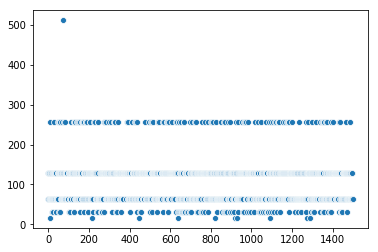

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
x = range(len(sq.tiles[-1500:-1]))
a = list((sq.tiles)[-1500:-1])
sns.scatterplot(x,a)
plt.show()

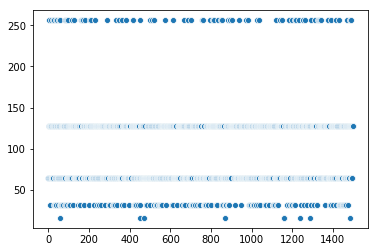

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
x = range(len(sq.tiles[1:1500]))
a = list((sq.tiles[1:1500]))
sns.scatterplot(x,a)
plt.show()

In [54]:
list(sq.tiles)[0:20]

[array(64),
 array(32),
 array(64),
 array(256),
 array(128),
 array(64),
 array(128),
 array(256),
 array(128),
 array(128),
 array(64),
 array(256),
 array(128),
 array(256),
 array(128),
 array(64),
 array(128),
 array(128),
 array(128),
 array(128)]

In [10]:
dqn.fit(env, nb_steps=10000, visualize=True, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
Score: 0.0
Highest: 2
[[0 0 0 0]
 [0 0 0 2]
 [0 0 0 0]
 [0 2 2 0]]
    1/10000 [..............................] - ETA: 13:10 - reward: 0.0000e+00Score: 0.0
Highest: 4
[[0 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 2 2 2]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [4 0 0 0]
 [0 0 4 0]
 [4 2 0 0]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [0 0 0 4]
 [0 2 0 4]
 [0 0 4 2]]
Score: 4.0
Highest: 4
[[0 0 4 0]
 [4 0 0 0]
 [2 4 0 0]
 [4 2 0 0]]
Score: 4.0
Highest: 4
[[0 0 0 4]
 [0 2 0 4]
 [0 0 2 4]
 [0 0 4 2]]
Score: 4.0
Highest: 4
[[4 0 0 0]
 [2 4 2 0]
 [2 4 0 0]
 [4 2 0 0]]
Score: 4.0
Highest: 4
[[0 2 0 4]
 [0 2 4 2]
 [0 0 2 4]
 [0 0 4 2]]
Score: 4.0
Highest: 4
[[2 4 0 0]
 [2 4 2 0]
 [2 4 0 2]
 [4 2 0 0]]
Score: 4.0
Highest: 4
[[0 0 2 4]
 [0 2 4 2]
 [0 2 4 2]
 [2 0 4 2]]
Score: 4.0
Highest: 4
[[2 4 2 0]
 [2 4 2 0]
 [2 4 2 0]
 [2 4 2 0]]
Score: 36.0
Highest: 8
[[0 0 0 2]
 [0 0 0 0]
 [4 8 4 0]
 [4 8 4 0]]
Score: 68.0
Highest: 16
[[ 0  2  0  0]
 [ 0  0  0  0]
 [ 

Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
   97/10000 [..............................] - ETA: 29s - reward: 1.2406Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
  101/10000 [..............................] - ETA: 2:07 - reward: 1.1914Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16  2]]
Score: 488.0
Highest: 64
[[ 2  2  8  2]
 [ 8  8  2 16]
 [ 4 16 64  4]
 [ 0  8 16 

  188/10000 [..............................] - ETA: 1:15 - reward: 1.0980Score: 940.0
Highest: 64
[[ 0  4 64  4]
 [ 0  0 16  4]
 [ 0 32 64 32]
 [ 0  2  2 16]]
Score: 944.0
Highest: 64
[[ 0  4 64  4]
 [ 0  0 16  4]
 [ 2 32 64 32]
 [ 0  0  4 16]]
Score: 952.0
Highest: 64
[[ 2  0 64  0]
 [ 0  0 16  8]
 [ 0  4 64 32]
 [ 2 32  4 16]]
Score: 956.0
Highest: 64
[[ 4  0 64  0]
 [ 0  0 16  8]
 [ 0  4 64 32]
 [ 4 32  4 16]]
Score: 956.0
Highest: 64
[[ 0  0  4 64]
 [ 4  0 16  8]
 [ 0  4 64 32]
 [ 4 32  4 16]]
Score: 964.0
Highest: 64
[[ 8  4  4 64]
 [ 0 32 16  8]
 [ 0  0 64 32]
 [ 2  0  4 16]]
Score: 964.0
Highest: 64
[[ 2  0  4 64]
 [ 0  0 16  8]
 [ 8  4 64 32]
 [ 2 32  4 16]]
Score: 964.0
Highest: 64
[[ 2  2  4 64]
 [ 0  0 16  8]
 [ 8  4 64 32]
 [ 2 32  4 16]]
Score: 968.0
Highest: 64
[[ 0  4  4 64]
 [ 2  0 16  8]
 [ 8  4 64 32]
 [ 2 32  4 16]]
Score: 976.0
Highest: 64
[[ 2  8  4 64]
 [ 8 32 16  8]
 [ 2  2 64 32]
 [ 0  0  4 16]]
Score: 976.0
Highest: 64
[[ 2  0  4 64]
 [ 2  8 16  8]
 [ 8 32 64 3

  279/10000 [..............................] - ETA: 57s - reward: 1.1245 Score: 8.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 2 0]
 [0 0 4 4]]
Score: 20.0
Highest: 8
[[0 2 0 0]
 [0 0 0 0]
 [0 0 0 4]
 [0 0 0 8]]
Score: 20.0
Highest: 8
[[0 0 0 0]
 [4 0 0 0]
 [0 0 0 4]
 [0 2 0 8]]
Score: 20.0
Highest: 8
[[0 0 0 0]
 [2 0 0 0]
 [0 0 0 4]
 [4 2 0 8]]
Score: 20.0
Highest: 8
[[0 4 0 0]
 [0 0 0 2]
 [0 0 0 4]
 [0 4 2 8]]
Score: 28.0
Highest: 8
[[0 8 2 2]
 [0 0 0 4]
 [0 0 2 8]
 [0 0 0 0]]
Score: 32.0
Highest: 8
[[0 0 0 0]
 [0 0 0 2]
 [2 0 0 4]
 [0 8 4 8]]
Score: 32.0
Highest: 8
[[2 8 4 2]
 [0 0 0 4]
 [0 0 0 8]
 [0 0 0 2]]
Score: 32.0
Highest: 8
[[0 0 0 2]
 [0 2 0 4]
 [0 0 0 8]
 [2 8 4 2]]
Score: 32.0
Highest: 8
[[2 2 4 2]
 [0 8 0 4]
 [0 0 2 8]
 [0 0 0 2]]
Score: 36.0
Highest: 8
[[4 4 2 0]
 [8 4 0 0]
 [2 8 0 0]
 [2 0 2 0]]
Score: 48.0
Highest: 8
[[0 2 8 2]
 [0 0 8 4]
 [0 0 2 8]
 [0 0 0 4]]
Score: 64.0
Highest: 16
[[ 0  2 16  2]
 [ 0  0  2  4]
 [ 0  0  0  8]
 [ 0  0  2  4]]
Score: 68.0
Highest: 16
[[ 

  401/10000 [>.............................] - ETA: 46s - reward: 1.2395Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8]
 [ 0  4 16  4]]
Score: 780.0
Highest: 64
[[ 0  2  4 16]
 [ 0  4  8 64]
 [ 0 16 64  8

Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
  510/10000 [>.............................] - ETA: 39s - reward: 1.0305Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8]
 [ 8  4 16  4]]
Score: 884.0
Highest: 64
[[ 0  2 16  4]
 [ 2 32  8 64]
 [ 4  8 64  8

  601/10000 [>.............................] - ETA: 36s - reward: 0.8934Score: 940.0
Highest: 64
[[ 8 16  4 64]
 [16 32 16  4]
 [ 8 64  4  2]
 [ 0  2  2 16]]
Score: 940.0
Highest: 64
[[ 8 16  4 64]
 [16 32 16  4]
 [ 8 64  4  2]
 [ 0  2  2 16]]
Score: 940.0
Highest: 64
[[ 8 16  4 64]
 [16 32 16  4]
 [ 8 64  4  2]
 [ 0  2  2 16]]
Score: 940.0
Highest: 64
[[ 8 16  4 64]
 [16 32 16  4]
 [ 8 64  4  2]
 [ 0  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2]
 [ 8  2  2 16]]
Score: 940.0
Highest: 64
[[ 2 16  4 64]
 [ 8 32 16  4]
 [16 64  4  2

Score: 84.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  2]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
  704/10000 [=>............................] - ETA: 33s - reward: 0.8167Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  2  2]]
Score: 88.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  4  8]
 [ 2  4  8  4]
 [ 0  0  

Score: 620.0
Highest: 64
[[ 2  2 32  8]
 [ 0 16  8 64]
 [ 2  4  2 32]
 [ 0  0  0  2]]
Score: 624.0
Highest: 64
[[ 0  4 32  8]
 [ 2 16  8 64]
 [ 2  4  2 32]
 [ 0  0  0  2]]
Score: 628.0
Highest: 64
[[ 4  4 32  8]
 [ 0 16  8 64]
 [ 0  4  2 32]
 [ 0  2  0  2]]
Score: 640.0
Highest: 64
[[ 0  8 32  8]
 [ 0 16  8 64]
 [ 0  4  2 32]
 [ 4  0  0  4]]
Score: 640.0
Highest: 64
[[ 0  0  2  8]
 [ 0  8 32 64]
 [ 0 16  8 32]
 [ 4  4  2  4]]
Score: 648.0
Highest: 64
[[ 0  0  2  8]
 [ 0  8 32 64]
 [ 2 16  8 32]
 [ 0  8  2  4]]
Score: 648.0
Highest: 64
[[ 2  8  2  8]
 [ 0 16 32 64]
 [ 0  8  8 32]
 [ 2  0  2  4]]
Score: 652.0
Highest: 64
[[ 0  2  2  8]
 [ 0  8 32 64]
 [ 0 16  8 32]
 [ 4  8  2  4]]
  801/10000 [=>............................] - ETA: 31s - reward: 0.8673Score: 652.0
Highest: 64
[[ 4  2  2  8]
 [ 2  8 32 64]
 [ 0 16  8 32]
 [ 0  8  2  4]]
Score: 652.0
Highest: 64
[[ 4  2  2  8]
 [ 2  8 32 64]
 [ 0 16  8 32]
 [ 0  8  2  4]]
Score: 652.0
Highest: 64
[[ 4  2  2  8]
 [ 2  8 32 64]
 [ 0 16  8 32

  877/10000 [=>............................] - ETA: 31s - reward: 0.9291Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   4   8]]
Score: 1328.0
Highest: 128
[[  8  16   2  16]
 [  2   4  64 128]
 [  0   0  16  32]
 [  0   0   

Score: 4.0
Highest: 4
[[0 0 4 0]
 [0 0 0 0]
 [4 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 0 4 0]
 [0 0 0 2]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [0 0 2 0]
 [0 0 0 0]
 [4 0 4 2]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [2 0 0 2]
 [0 0 0 0]
 [0 0 8 2]]
Score: 16.0
Highest: 8
[[0 0 0 0]
 [4 0 2 0]
 [0 0 0 0]
 [8 2 0 0]]
Score: 16.0
Highest: 8
[[0 0 0 0]
 [0 0 4 2]
 [0 0 0 0]
 [2 0 8 2]]
Score: 20.0
Highest: 8
[[2 0 4 4]
 [2 0 8 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 24.0
Highest: 8
[[0 0 0 0]
 [2 0 0 0]
 [0 0 4 0]
 [4 0 8 4]]
  964/10000 [=>............................] - ETA: 30s - reward: 0.9442Score: 24.0
Highest: 8
[[0 0 0 0]
 [0 0 2 2]
 [0 0 0 4]
 [0 4 8 4]]
Score: 32.0
Highest: 8
[[2 4 2 2]
 [0 0 8 8]
 [0 0 0 0]
 [0 0 0 0]]
Score: 32.0
Highest: 8
[[0 0 0 0]
 [0 2 0 0]
 [0 0 2 2]
 [2 4 8 8]]
Score: 32.0
Highest: 8
[[2 2 2 2]
 [2 4 8 8]
 [0 0 0 0]
 [0 0 0 0]]
Score: 36.0
Highest: 8
[[4 2 2 2]
 [0 4 8 8]
 [0 0 2 0]
 [0 0 0 0]]
Score: 36.0
Highest: 8
[[0 0 0 0]
 [0 0 2 0]
 [

Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
 1056/10000 [==>...........................] - ETA: 30s - reward: 0.9531Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64]
 [ 0  2  0  8]]
Score: 436.0
Highest: 64
[[ 0 16  4  2]
 [ 0  2 16  8]
 [ 0  4  4 64

Score: 964.0
Highest: 128
[[  2   0  16  32]
 [  0   0   4 128]
 [  0   0   0  16]
 [  2   0   0   4]]
 1144/10000 [==>...........................] - ETA: 29s - reward: 0.9508Score: 968.0
Highest: 128
[[  4   0  16  32]
 [  0   0   4 128]
 [  0   2   0  16]
 [  0   0   0   4]]
Score: 968.0
Highest: 128
[[  0   0   0  32]
 [  0   0   2 128]
 [  0   0  16  16]
 [  4   2   4   4]]
Score: 968.0
Highest: 128
[[  4   2   2  32]
 [  0   4  16 128]
 [  0   0   4  16]
 [  0   0   0   4]]
Score: 968.0
Highest: 128
[[  0   0   0  32]
 [  2   0   2 128]
 [  0   2  16  16]
 [  4   4   4   4]]
Score: 1020.0
Highest: 128
[[  0   0   0  32]
 [  0   0   4 128]
 [  0   0   2  32]
 [  2   0   8   8]]
Score: 1020.0
Highest: 128
[[  2   0   4  32]
 [  0   0   2 128]
 [  0   2   8  32]
 [  0   0   0   8]]
Score: 1020.0
Highest: 128
[[  2   2   4  32]
 [  0   0   2 128]
 [  2   0   8  32]
 [  0   0   0   8]]
Score: 1024.0
Highest: 128
[[  0   4   4  32]
 [  0   2   2 128]
 [  0   2   8  32]
 [  0   0   0   8

Score: 1332.0
Highest: 128
[[  2   4   4  32]
 [  0   8  32   2]
 [  2   0 128  64]
 [  0   0   4   8]]
Score: 1336.0
Highest: 128
[[  2   0   4  32]
 [  0   0  32   2]
 [  0   4 128  64]
 [  4   8   4   8]]
Score: 1336.0
Highest: 128
[[  2   4   4  32]
 [  4   8  32   2]
 [  0   0 128  64]
 [  0   2   4   8]]
Score: 1336.0
Highest: 128
[[  0   0   4  32]
 [  2   4  32   2]
 [  2   8 128  64]
 [  4   2   4   8]]
Score: 1340.0
Highest: 128
[[  2   0   4  32]
 [  0   4  32   2]
 [  4   8 128  64]
 [  4   2   4   8]]
Score: 1348.0
Highest: 128
[[  0   2   4  32]
 [  0   4  32   2]
 [  2   8 128  64]
 [  8   2   4   8]]
Score: 1348.0
Highest: 128
[[  2   2   4  32]
 [  8   4  32   2]
 [  2   8 128  64]
 [  0   2   4   8]]
Score: 1352.0
Highest: 128
[[  0   4   4  32]
 [  8   4  32   2]
 [  2   8 128  64]
 [  2   2   4   8]]
Score: 1364.0
Highest: 128
[[  8  32   0   0]
 [  8   4  32   2]
 [  2   8 128  64]
 [  4   4   8   2]]
Score: 1372.0
Highest: 128
[[  2   0   8  32]
 [  8   4  32   2]

 1297/10000 [==>...........................] - ETA: 28s - reward: 0.9578Score: 1692.0
Highest: 128
[[  0  16  64   4]
 [  0  32 128  64]
 [  0   4   8  32]
 [  0   2   4   8]]
Score: 1692.0
Highest: 128
[[  0  16  64   4]
 [  0  32 128  64]
 [  0   4   8  32]
 [  0   2   4   8]]
Score: 1692.0
Highest: 128
[[ 16  64   4   2]
 [ 32 128  64   0]
 [  4   8  32   0]
 [  2   4   8   0]]
Score: 1692.0
Highest: 128
[[ 16  64   4   2]
 [  0  32 128  64]
 [  0   4   8  32]
 [  2   2   4   8]]
Score: 1696.0
Highest: 128
[[ 16  64   4   2]
 [  0  32 128  64]
 [  2   4   8  32]
 [  0   4   4   8]]
Score: 1704.0
Highest: 128
[[ 16  64   4   2]
 [  2  32 128  64]
 [  0   8   8  32]
 [  0   2   4   8]]
Score: 1720.0
Highest: 128
[[ 16  64   4   2]
 [  2  32 128  64]
 [  0   2  16  32]
 [  0   2   4   8]]
Score: 1724.0
Highest: 128
[[ 16  64   4   2]
 [  2  32 128  64]
 [  2   4  16  32]
 [  0   0   4   8]]
Score: 1728.0
Highest: 128
[[ 16  64   4   2]
 [  4  32 128  64]
 [  0   4  16  32]
 [  0   4   

Score: 620.0
Highest: 64
[[ 2  2  4  8]
 [ 0  2 32  4]
 [ 0 32 64  2]
 [ 0  8  2 16]]
Score: 624.0
Highest: 64
[[ 2  4  4  8]
 [ 2 32 32  4]
 [ 0  8 64  2]
 [ 0  0  2 16]]
Score: 628.0
Highest: 64
[[ 4  4  4  8]
 [ 0 32 32  4]
 [ 4  8 64  2]
 [ 0  0  2 16]]
Score: 700.0
Highest: 64
[[ 0  4  8  8]
 [ 0  0 64  4]
 [ 4  8 64  2]
 [ 0  2  2 16]]
Score: 828.0
Highest: 128
[[  4   4   8   8]
 [  0   8 128   4]
 [  0   2   2   2]
 [  0   4   0  16]]
Score: 828.0
Highest: 128
[[  4   4   8   8]
 [  0   8 128   4]
 [  0   2   2   2]
 [  0   4   0  16]]
Score: 856.0
Highest: 128
[[  2   0   8  16]
 [  0   8 128   4]
 [  0   0   2   4]
 [  0   0   4  16]]
 1399/10000 [===>..........................] - ETA: 27s - reward: 1.0239Score: 864.0
Highest: 128
[[  0   0   8   2]
 [  0   0 128  16]
 [  0   0   2   8]
 [  2   8   4  16]]
Score: 864.0
Highest: 128
[[  2   8   8   2]
 [  0   0 128  16]
 [  2   0   2   8]
 [  0   0   4  16]]
Score: 884.0
Highest: 128
[[  0   2  16   2]
 [  0   0 128  16]
 [  0

Score: 132.0
Highest: 16
[[ 8  2  2  4]
 [ 0  0  4 16]
 [ 0  0 16  8]
 [ 2  0  0  2]]
Score: 132.0
Highest: 16
[[ 0  0  2  4]
 [ 0  0  2 16]
 [ 8  0  4  8]
 [ 2  2 16  2]]
Score: 136.0
Highest: 16
[[ 0  0  2  4]
 [ 0  2  2 16]
 [ 0  8  4  8]
 [ 0  4 16  2]]
Score: 140.0
Highest: 16
[[ 0  2  4  4]
 [ 0  8  4 16]
 [ 0  4 16  8]
 [ 4  0  0  2]]
Score: 148.0
Highest: 16
[[ 0  0  2  8]
 [ 0  8  4 16]
 [ 0  4 16  8]
 [ 2  0  4  2]]
Score: 148.0
Highest: 16
[[ 0  0  2  8]
 [ 0  8  4 16]
 [ 2  4 16  8]
 [ 0  2  4  2]]
Score: 148.0
Highest: 16
[[ 2  8  2  8]
 [ 2  4  4 16]
 [ 0  2 16  8]
 [ 0  0  4  2]]
Score: 152.0
Highest: 16
[[ 0  0  2  8]
 [ 0  8  4 16]
 [ 2  4 16  8]
 [ 4  2  4  2]]
Score: 152.0
Highest: 16
[[ 2  8  2  8]
 [ 4  4  4 16]
 [ 0  2 16  8]
 [ 2  0  4  2]]
Score: 160.0
Highest: 16
[[ 2  8  2  8]
 [ 8  4 16  2]
 [ 2 16  8  0]
 [ 2  4  2  0]]
Score: 164.0
Highest: 16
[[ 0  8  2  0]
 [ 2  4 16  2]
 [ 8 16  8  8]
 [ 4  4  2  2]]
Score: 192.0
Highest: 16
[[ 0  0  8  2]
 [ 2  4 16  2]

Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
 1588/10000 [===>..........................] - ETA: 26s - reward: 1.0457Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2]
 [ 2  4  2 32]]
Score: 500.0
Highest: 32
[[ 2  4  2  4]
 [ 0  8 16 32]
 [16  4 32  2

Score: 1372.0
Highest: 128
[[  2   0   4   8]
 [  0   2  32 128]
 [  4   8  64   2]
 [  2   4   8  32]]
Score: 1372.0
Highest: 128
[[  2   2   4   8]
 [  0   2  32 128]
 [  4   8  64   2]
 [  2   4   8  32]]
Score: 1376.0
Highest: 128
[[  2   4   4   8]
 [  4   8  32 128]
 [  2   4  64   2]
 [  4   0   8  32]]
Score: 1384.0
Highest: 128
[[  2   2   8   8]
 [  4   8  32 128]
 [  2   4  64   2]
 [  0   4   8  32]]
 1676/10000 [====>.........................] - ETA: 26s - reward: 1.0798Score: 1404.0
Highest: 128
[[  0   2   4  16]
 [  4   8  32 128]
 [  2   4  64   2]
 [  0   4   8  32]]
Score: 1412.0
Highest: 128
[[  2   0   4  16]
 [  0   2  32 128]
 [  4   8  64   2]
 [  2   8   8  32]]
Score: 1428.0
Highest: 128
[[  0   0   4  16]
 [  2   2  32 128]
 [  4   2  64   2]
 [  2  16   8  32]]
Score: 1432.0
Highest: 128
[[  2   4   4  16]
 [  4  16  32 128]
 [  2   0  64   2]
 [  2   0   8  32]]
Score: 1436.0
Highest: 128
[[  0   0   4  16]
 [  2   2  32 128]
 [  4   4  64   2]
 [  4  16   

Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
 1755/10000 [====>.........................] - ETA: 25s - reward: 1.1024Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  16  32]]
Score: 2064.0
Highest: 128
[[  0   4  16   2]
 [  0   8  64 128]
 [  2   8 128   2]
 [  0   0  1

Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]
 [  0  32 128   4]
 [  0   2  32   2]]
Score: 2244.0
Highest: 128
[[  4   2  16   4]
 [  2  32  64 128]

Score: 180.0
Highest: 32
[[ 0  0  0  8]
 [ 2  0  4  4]
 [ 0  0  8 32]
 [ 0  2  4  8]]
Score: 180.0
Highest: 32
[[ 2  2  4  8]
 [ 2  0  8  4]
 [ 0  0  4 32]
 [ 0  0  0  8]]
Score: 184.0
Highest: 32
[[ 4  4  8  0]
 [ 2  8  4  0]
 [ 4 32  2  0]
 [ 8  0  0  0]]
Score: 192.0
Highest: 32
[[ 2  0  8  8]
 [ 0  2  8  4]
 [ 0  4 32  2]
 [ 0  0  0  8]]
 1919/10000 [====>.........................] - ETA: 25s - reward: 1.0664Score: 208.0
Highest: 32
[[ 2  0  2 16]
 [ 0  2  8  4]
 [ 0  4 32  2]
 [ 0  0  0  8]]
Score: 208.0
Highest: 32
[[ 0  0  0 16]
 [ 0  0  2  4]
 [ 2  2  8  2]
 [ 2  4 32  8]]
Score: 212.0
Highest: 32
[[ 4  2  2 16]
 [ 0  4  8  4]
 [ 0  0 32  2]
 [ 0  0  2  8]]
Score: 212.0
Highest: 32
[[ 0  2  2 16]
 [ 0  0  8  4]
 [ 0  2 32  2]
 [ 4  4  2  8]]
Score: 224.0
Highest: 32
[[ 0  0  4 16]
 [ 0  2  8  4]
 [ 0  2 32  2]
 [ 0  8  2  8]]
Score: 228.0
Highest: 32
[[ 0  4  4 16]
 [ 0  8  8  4]
 [ 0  0 32  2]
 [ 0  2  2  8]]
Score: 256.0
Highest: 32
[[ 8 16  0  0]
 [16  4  0  0]
 [32  2  0  0

Score: 844.0
Highest: 64
[[ 2 16  2  8]
 [ 0  0  8 32]
 [ 2  0 64  8]
 [ 0  0  8 64]]
Score: 848.0
Highest: 64
[[ 0  2  2  8]
 [ 0  0  8 32]
 [ 0  0 64  8]
 [ 4 16  8 64]]
Score: 848.0
Highest: 64
[[ 4  2  2  8]
 [ 0 16  8 32]
 [ 0  0 64  8]
 [ 0  2  8 64]]
 2010/10000 [=====>........................] - ETA: 24s - reward: 1.0874Score: 848.0
Highest: 64
[[ 0  2  2  8]
 [ 0  2  8 32]
 [ 0 16 64  8]
 [ 4  2  8 64]]
Score: 852.0
Highest: 64
[[ 4  4  2  8]
 [ 0 16  8 32]
 [ 2  2 64  8]
 [ 0  0  8 64]]
Score: 864.0
Highest: 64
[[ 0  8  2  8]
 [ 0 16  8 32]
 [ 2  4 64  8]
 [ 0  0  8 64]]
Score: 864.0
Highest: 64
[[ 0  0  2  8]
 [ 0  8  8 32]
 [ 2 16 64  8]
 [ 2  4  8 64]]
Score: 868.0
Highest: 64
[[ 4  8  2  8]
 [ 0 16  8 32]
 [ 0  4 64  8]
 [ 0  2  8 64]]
Score: 868.0
Highest: 64
[[ 4  8  2  8]
 [ 0 16  8 32]
 [ 0  4 64  8]
 [ 0  2  8 64]]
Score: 868.0
Highest: 64
[[ 4  8  2  8]
 [ 0 16  8 32]
 [ 0  4 64  8]
 [ 0  2  8 64]]
Score: 868.0
Highest: 64
[[ 4  8  2  8]
 [ 0 16  8 32]
 [ 0  4 64  8

Score: 36.0
Highest: 8
[[4 2 8 0]
 [8 0 0 0]
 [4 0 0 0]
 [4 0 0 4]]
Score: 44.0
Highest: 8
[[2 4 2 8]
 [0 0 0 8]
 [0 0 0 4]
 [0 0 0 8]]
 2103/10000 [=====>........................] - ETA: 24s - reward: 1.0877Score: 44.0
Highest: 8
[[2 4 2 8]
 [8 0 0 0]
 [4 0 0 0]
 [8 2 0 0]]
Score: 44.0
Highest: 8
[[2 4 2 8]
 [8 0 0 0]
 [4 0 0 0]
 [8 2 0 0]]
Score: 44.0
Highest: 8
[[2 4 2 8]
 [0 0 0 8]
 [0 0 2 4]
 [0 0 8 2]]
Score: 64.0
Highest: 16
[[ 0  0  2  0]
 [ 0  0  0 16]
 [ 0  0  4  4]
 [ 2  4  8  2]]
Score: 72.0
Highest: 16
[[ 0  0  2  2]
 [ 0  0  0 16]
 [ 0  0  0  8]
 [ 2  4  8  2]]
Score: 72.0
Highest: 16
[[ 2  4  2  2]
 [ 0  0  8 16]
 [ 0  0  0  8]
 [ 0  0  2  2]]
Score: 72.0
Highest: 16
[[ 0  0  0  2]
 [ 0  2  2 16]
 [ 0  0  8  8]
 [ 2  4  2  2]]
Score: 96.0
Highest: 16
[[ 2  0  0  0]
 [ 4 16  0  0]
 [16  2  0  0]
 [ 2  4  4  0]]
Score: 104.0
Highest: 16
[[ 0  0  0  2]
 [ 2  0  4 16]
 [ 0  0 16  2]
 [ 0  0  2  8]]
Score: 104.0
Highest: 16
[[ 2  0  0  0]
 [ 2  4 16  0]
 [16  2  0  2]
 [ 2  8

 2201/10000 [=====>........................] - ETA: 23s - reward: 1.0973Score: 596.0
Highest: 64
[[ 2  8 16  0]
 [16 64  4  2]
 [ 4 32 16  0]
 [ 2  4  8  0]]
Score: 596.0
Highest: 64
[[ 0  2  8 16]
 [16 64  4  2]
 [ 2  4 32 16]
 [ 0  2  4  8]]
Score: 596.0
Highest: 64
[[16  2  8 16]
 [ 2 64  4  2]
 [ 0  4 32 16]
 [ 2  2  4  8]]
Score: 600.0
Highest: 64
[[16  2  8 16]
 [ 2 64  4  2]
 [ 0  4 32 16]
 [ 2  4  4  8]]
Score: 608.0
Highest: 64
[[16  2  8 16]
 [ 2 64  4  2]
 [ 0  4 32 16]
 [ 2  2  8  8]]
Score: 628.0
Highest: 64
[[16  2  8 16]
 [ 2 64  4  2]
 [ 2  4 32 16]
 [ 0  0  4 16]]
Score: 664.0
Highest: 64
[[ 2  0  8  0]
 [ 0  2  4 16]
 [16 64 32  2]
 [ 4  4  4 32]]
Score: 672.0
Highest: 64
[[ 0  0  2  8]
 [ 0  2  4 16]
 [16 64 32  2]
 [ 2  4  8 32]]
Score: 672.0
Highest: 64
[[16  2  2  8]
 [ 2 64  4 16]
 [ 0  4 32  2]
 [ 2  0  8 32]]
Score: 676.0
Highest: 64
[[ 2 16  4  8]
 [ 2 64  4 16]
 [ 0  4 32  2]
 [ 0  2  8 32]]
Score: 688.0
Highest: 64
[[ 0 16  0  8]
 [ 0 64  8 16]
 [ 2  4 32  2

Score: 156.0
Highest: 16
[[ 2  8  0  0]
 [16  0  0  0]
 [ 4 16  8  0]
 [16  0  0  2]]
Score: 156.0
Highest: 16
[[ 0  4  2  8]
 [ 0  0  0 16]
 [ 0  4 16  8]
 [ 0  0 16  2]]
Score: 196.0
Highest: 32
[[ 0  0  0  8]
 [ 0  0  0 16]
 [ 0  0  2  8]
 [ 2  8 32  2]]
 2301/10000 [=====>........................] - ETA: 23s - reward: 1.1062Score: 196.0
Highest: 32
[[ 2  8  2  8]
 [ 0  0 32 16]
 [ 0  0  0  8]
 [ 0  0  2  2]]
Score: 196.0
Highest: 32
[[ 2  0  0  8]
 [ 0  0  2 16]
 [ 0  0 32  8]
 [ 2  8  2  2]]
Score: 200.0
Highest: 32
[[ 4  8  2  8]
 [ 2  0 32 16]
 [ 0  0  2  8]
 [ 0  0  0  2]]
Score: 200.0
Highest: 32
[[ 0  2  0  8]
 [ 0  0  2 16]
 [ 4  0 32  8]
 [ 2  8  2  2]]
Score: 200.0
Highest: 32
[[ 4  2  2  8]
 [ 2  8 32 16]
 [ 0  2  2  8]
 [ 0  0  0  2]]
Score: 200.0
Highest: 32
[[ 0  2  0  8]
 [ 0  2  2 16]
 [ 4  8 32  8]
 [ 2  2  2  2]]
Score: 212.0
Highest: 32
[[ 0  0  2  8]
 [ 0  0  4 16]
 [ 4  8 32  8]
 [ 2  0  4  4]]
Score: 212.0
Highest: 32
[[ 4  8  2  8]
 [ 2  0  4 16]
 [ 0  2 32  8

Score: 712.0
Highest: 64
[[ 0  0 16  2]
 [ 0 16 32  4]
 [ 2  8 64 32]
 [ 2  4 16  4]]
Score: 716.0
Highest: 64
[[ 4 16 16  2]
 [ 0  8 32  4]
 [ 2  4 64 32]
 [ 0  0 16  4]]
Score: 716.0
Highest: 64
[[ 0  0 16  2]
 [ 4 16 32  4]
 [ 4  8 64 32]
 [ 2  4 16  4]]
Score: 724.0
Highest: 64
[[ 0  2 16  2]
 [ 0 16 32  4]
 [ 8  8 64 32]
 [ 2  4 16  4]]
Score: 740.0
Highest: 64
[[ 0  2 16  2]
 [ 2 16 32  4]
 [ 0 16 64 32]
 [ 2  4 16  4]]
Score: 776.0
Highest: 64
[[ 4  2 16  2]
 [ 0 32 32  4]
 [ 0  4 64 32]
 [ 2  0 16  4]]
Score: 776.0
Highest: 64
[[ 0  2 16  2]
 [ 0  2 32  4]
 [ 4 32 64 32]
 [ 2  4 16  4]]
Score: 780.0
Highest: 64
[[ 4  4 16  2]
 [ 2 32 32  4]
 [ 2  4 64 32]
 [ 0  0 16  4]]
Score: 852.0
Highest: 64
[[ 0  8 16  2]
 [ 2  2 64  4]
 [ 2  4 64 32]
 [ 0  0 16  4]]
Score: 984.0
Highest: 128
[[  2   0   0   2]
 [  0   8  16   4]
 [  0   2 128  32]
 [  4   4  16   4]]
Score: 996.0
Highest: 128
[[  0   0   2   4]
 [  0   8  16   4]
 [  0   2 128  32]
 [  0   8  16   4]]
 2401/10000 [======>

Score: 180.0
Highest: 32
[[ 0  4  8  2]
 [ 0  0  4  4]
 [ 2  8 32  8]
 [ 2  4  2  4]]
 2492/10000 [======>.......................] - ETA: 22s - reward: 1.1226Score: 188.0
Highest: 32
[[ 0  4  8  2]
 [ 2  0  0  8]
 [ 2  8 32  8]
 [ 2  4  2  4]]
Score: 208.0
Highest: 32
[[ 4  4  8  2]
 [ 2  8 32 16]
 [ 0  4  2  4]
 [ 2  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  8  8  2]
 [ 2  8 32 16]
 [ 0  4  2  4]
 [ 0  2  0  2]]
Score: 236.0
Highest: 32
[[16  2  0  0]
 [ 2  8 32 16]
 [ 4  2  4  2]
 [ 4  0  0  0]]
Score: 236.0
Highest: 32
[[ 0  0 16  2]
 [ 2  8 32 16]
 [ 4  2  4  2]
 [ 0  0  2  4]]
Score: 236.0
Highest: 32
[[16  2  2  0]
 [ 2  8 32 16]
 [ 4  2  4  2]
 [ 2  4  0  0]]
Score: 240.0
Highest: 32
[[16  4  2  0]
 [ 2  8 32 16]
 [ 4  2  4  2]
 [ 2  4  0  0]]
Score: 240.0
Highest: 32
[[ 0 16  4  2]
 [ 2  8 32 16]
 [ 4  2  4  2]
 [ 0  2  2  4]]
Score: 244.0
Highest: 32
[[ 2 16  4  2]
 [ 4  8 32 16]
 [ 2  4  4  2]
 [ 0  0  2  4]]
Score: 244.0
Highest: 32
[[ 4  0  4  2]
 [ 2 16 32 16]
 [ 4  8  4  2

Score: 668.0
Highest: 64
[[ 2  4  2  2]
 [16 32  4  4]
 [ 8  2 64 16]
 [ 2 32  4  4]]
Score: 688.0
Highest: 64
[[ 0  2  4  4]
 [ 2 16 32  8]
 [ 8  2 64 16]
 [ 0  2 32  8]]
Score: 692.0
Highest: 64
[[ 0  0  4  4]
 [ 2  2 32  8]
 [ 2 16 64 16]
 [ 8  4 32  8]]
Score: 696.0
Highest: 64
[[ 4  2  4  4]
 [ 8 16 32  8]
 [ 0  4 64 16]
 [ 0  2 32  8]]
 2596/10000 [======>.......................] - ETA: 22s - reward: 1.1242Score: 696.0
Highest: 64
[[ 0  2  4  4]
 [ 2 16 32  8]
 [ 4  4 64 16]
 [ 8  2 32  8]]
Score: 696.0
Highest: 64
[[ 0  2  4  4]
 [ 2 16 32  8]
 [ 4  4 64 16]
 [ 8  2 32  8]]
Score: 696.0
Highest: 64
[[ 2  2  4  4]
 [ 4 16 32  8]
 [ 8  4 64 16]
 [ 2  2 32  8]]
Score: 712.0
Highest: 64
[[ 4  8  0  0]
 [ 4 16 32  8]
 [ 8  4 64 16]
 [ 4 32  8  2]]
Score: 720.0
Highest: 64
[[ 8  8 32  8]
 [ 8 16 64 16]
 [ 4  4  8  2]
 [ 0 32  2  0]]
Score: 744.0
Highest: 64
[[ 0 16 32  8]
 [ 8 16 64 16]
 [ 0  8  8  2]
 [ 4  0 32  2]]
Score: 760.0
Highest: 64
[[ 0 16 32  8]
 [ 8 16 64 16]
 [ 0  0 16  2

 2671/10000 [=======>......................] - ETA: 21s - reward: 1.1417Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   8   2]]
Score: 1432.0
Highest: 128
[[  0   2  16  32]
 [  0   4 128  64]
 [  4  16  32   8]
 [  2   4   

Score: 2332.0
Highest: 256
[[  0   2  16   2]
 [  0   8  16 256]
 [  2   4  64  16]
 [  0   2  32   2]]
Score: 2332.0
Highest: 256
[[  2  16   2   0]
 [  8  16 256   2]
 [  2   4  64  16]
 [  2  32   2   0]]
Score: 2332.0
Highest: 256
[[  0   2  16   2]
 [  8  16 256   2]
 [  2   4  64  16]
 [  2   2  32   2]]
Score: 2340.0
Highest: 256
[[  2   2  16   0]
 [  0  16 256   4]
 [  8   4  64  16]
 [  4   2  32   2]]
Score: 2344.0
Highest: 256
[[  0   4   4  16]
 [  0  16 256   4]
 [  8   4  64  16]
 [  4   2  32   2]]
Score: 2344.0
Highest: 256
[[  8   4   4  16]
 [  4  16 256   4]
 [  0   4  64  16]
 [  4   2  32   2]]
Score: 2352.0
Highest: 256
[[  0   4   4  16]
 [  2  16 256   4]
 [  8   4  64  16]
 [  8   2  32   2]]
Score: 2368.0
Highest: 256
[[  2   4   4  16]
 [ 16  16 256   4]
 [  0   4  64  16]
 [  2   2  32   2]]
Score: 2368.0
Highest: 256
[[  2   4   4  16]
 [  2  16 256   4]
 [ 16   4  64  16]
 [  2   2  32   2]]
Score: 2380.0
Highest: 256
[[  4   2   8  16]
 [  2  16 256   4]

Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
 2828/10000 [=======>......................] - ETA: 21s - reward: 1.1293Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  32   2]]
Score: 2392.0
Highest: 256
[[  4   2   8  16]
 [  2   4 256   4]
 [ 16  16  64  16]
 [  2   8  3

Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]
 [  8  32  64  16]
 [  2   8  32   4]]
Score: 2548.0
Highest: 256
[[  2   4  32   2]
 [  2  16 256   4]

 2993/10000 [=======>......................] - ETA: 20s - reward: 1.1003Score: 196.0
Highest: 32
[[ 2  4 16  0]
 [ 4 32  0  0]
 [ 8  4  0  2]
 [ 2  4  0  0]]
Score: 204.0
Highest: 32
[[ 2  0  0  0]
 [ 4  4  0  2]
 [ 8 32  0  0]
 [ 2  8 16  2]]
Score: 212.0
Highest: 32
[[ 2  0  0  2]
 [ 8  2  0  0]
 [ 8 32  0  0]
 [ 2  8 16  2]]
Score: 216.0
Highest: 32
[[ 0  0  0  4]
 [ 0  2  8  2]
 [ 0  0  8 32]
 [ 2  8 16  2]]
Score: 232.0
Highest: 32
[[ 2  2 16  4]
 [ 0  8 16  2]
 [ 0  0  0 32]
 [ 2  0  0  2]]
Score: 240.0
Highest: 32
[[ 4 16  4  0]
 [ 8 16  2  0]
 [32  0  0  0]
 [ 4  0  4  0]]
Score: 272.0
Highest: 32
[[ 4  0  0  0]
 [ 8  0  4  0]
 [32  2  2  0]
 [ 4 32  4  0]]
Score: 276.0
Highest: 32
[[ 0  0  0  4]
 [ 0  0  8  4]
 [ 0  2 32  4]
 [ 0  4 32  4]]
Score: 356.0
Highest: 64
[[ 0  2  8  8]
 [ 2  4 64  8]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Score: 372.0
Highest: 64
[[ 2 16  0  2]
 [ 2  4 64  8]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Score: 372.0
Highest: 64
[[ 2 16  2  0]
 [ 2  4 64  8]
 [ 0  0  0  0

Score: 968.0
Highest: 128
[[  0   2  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  2   4   0  16]]
Score: 968.0
Highest: 128
[[  2   2  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
 3093/10000 [========>.....................] - ETA: 20s - reward: 1.1131Score: 972.0
Highest: 128
[[  2   4  32   4]
 [  0   8 128   8]
 [  0   2   4   2]
 [  0   4   2  16]]
S

Score: 1352.0
Highest: 128
[[  0   2  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   4  16   4]]
Score: 1352.0
Highest: 128
[[  0   2  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   4  16   4]]
Score: 1352.0
Highest: 128
[[  2   2  16   2]
 [  8  32 128  64]
 [  2  16   4   2]
 [  2   4  16   4]]
Score: 1356.0
Highest: 128
[[  2   2  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  4   4  16   4]]
Score: 1368.0
Highest: 128
[[  0   4  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   8  16   4]]
Score: 1368.0
Highest: 128
[[  0   4  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   8  16   4]]
Score: 1368.0
Highest: 128
[[  0   4  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   8  16   4]]
Score: 1368.0
Highest: 128
[[  0   4  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   8  16   4]]
Score: 1368.0
Highest: 128
[[  0   4  16   2]
 [  2  32 128  64]
 [  8  16   4   2]
 [  2   8  16   4]]
 3181/10000 [========>.....................] - ETA: 19s - reward

Score: 188.0
Highest: 32
[[ 0  2  2  4]
 [ 0  2  4  8]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 192.0
Highest: 32
[[ 4  4  0  0]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 8  2  8  0]]
Score: 200.0
Highest: 32
[[ 0  0  2  8]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 200.0
Highest: 32
[[ 0  0  2  8]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 200.0
Highest: 32
[[ 0  0  2  8]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 200.0
Highest: 32
[[ 0  0  2  8]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 200.0
Highest: 32
[[ 0  0  2  8]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 0  8  2  8]]
Score: 200.0
Highest: 32
[[ 2  8  0  2]
 [ 2  4  8  2]
 [ 4  8 32  2]
 [ 8  2  8  0]]
Score: 208.0
Highest: 32
[[ 4  8  8  4]
 [ 4  4 32  2]
 [ 8  8  8  2]
 [ 0  2  0  0]]
Score: 248.0
Highest: 32
[[ 4 16  4  0]
 [ 8 32  2  0]
 [16  8  2  0]
 [ 2  0  0  2]]
Score: 252.0
Highest: 32
[[ 4  0  0  0]
 [ 8 16  2  0]
 [16 32  4  0]
 [ 2  8  4  2]]
Score: 260.0
Highest: 32
[[ 4 16  2  2]
 [ 8 32  8  0]

Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
 3361/10000 [=========>....................] - ETA: 19s - reward: 1.0896Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2]
 [ 0  2  4  8]]
Score: 496.0
Highest: 64
[[ 4  2  4  8]
 [ 2  4 32  4]
 [ 2  8 64  2

Score: 692.0
Highest: 64
[[ 4 16  2  2]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
 3472/10000 [=========>....................] - ETA: 18s - reward: 1.0694Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2]
 [ 2  4  8 16]]
Score: 696.0
Highest: 64
[[ 2  4 16  4]
 [ 4  8 32  4]
 [ 4 32 64  2

Score: 1100.0
Highest: 128
[[  8  16   4   8]
 [  0  32 128   2]
 [  2   2   8  32]
 [  0   4   8   2]]
Score: 1116.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  0   2  16  32]
 [  0   4   2   2]]
Score: 1120.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  0   2  16  32]
 [  2   0   4   4]]
Score: 1128.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  4   2  16  32]
 [  0   0   2   8]]
Score: 1128.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  4   2  16  32]
 [  0   0   2   8]]
Score: 1128.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  4   2  16  32]
 [  0   0   2   8]]
Score: 1128.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  4   2  16  32]
 [  0   0   2   8]]
Score: 1128.0
Highest: 128
[[  8  16   4   8]
 [  2  32 128   2]
 [  4   2  16  32]
 [  0   0   2   8]]
Score: 1128.0
Highest: 128
[[  2   0   4   8]
 [  8  16 128   2]
 [  2  32  16  32]
 [  4   2   2   8]]
Score: 1132.0
Highest: 128
[[  0   2   4   8]
 [  8  16 128   2]

Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 312.0
Highest: 32
[[ 4  2 32  4]
 [16  4 32  2]
 [ 0  0  0  8]
 [ 0  0  0  4]]
Score: 376.0
Highest: 64
[[ 0  0  0  4]
 [ 0  0  0  2]
 [ 4  2  2  8]
 [16  4 64  4]]
Score: 376.0
Highest: 64
[[ 4  2  2  4]
 [16  4 64  2]
 [ 0  4  0  8]
 [ 0  0  0  4]]
Score: 384.0
Highest: 64
[[ 0  0  2  4]
 [ 0  0  0  2]
 [ 4  2  2  8]
 [16  8 64  4]]
Score: 388.0
Highest: 64
[[ 4  2  4  4]
 [16  8 64  2]
 [ 2  0  0  8]
 [ 0  0  0  4]]
 3653/10000 [=========>....................] - ETA: 18

Score: 1024.0
Highest: 128
[[  2  16  16   2]
 [  0   4  32   8]
 [  2   2  16 128]
 [  0   0   8   2]]
Score: 1028.0
Highest: 128
[[  0   0  16   2]
 [  2  16  32   8]
 [  0   4  16 128]
 [  4   2   8   2]]
Score: 1028.0
Highest: 128
[[  2  16  16   2]
 [  4   4  32   8]
 [  0   2  16 128]
 [  2   0   8   2]]
Score: 1068.0
Highest: 128
[[  0   2  32   2]
 [  2   8  32   8]
 [  0   2  16 128]
 [  0   2   8   2]]
Score: 1136.0
Highest: 128
[[  2   2  64   2]
 [  0   8  16   8]
 [  2   4   8 128]
 [  0   0   0   2]]
Score: 1140.0
Highest: 128
[[  0   0   0   2]
 [  0   2  64   8]
 [  2   8  16 128]
 [  4   4   8   2]]
Score: 1148.0
Highest: 128
[[  0   0   0   2]
 [  2   2  64   8]
 [  2   8  16 128]
 [  0   8   8   2]]
Score: 1168.0
Highest: 128
[[  0   2   0   2]
 [  0   0  64   8]
 [  0   2  16 128]
 [  4  16   8   2]]
Score: 1172.0
Highest: 128
[[  4   4  64   2]
 [  0  16  16   8]
 [  0   0   8 128]
 [  2   0   0   2]]
Score: 1216.0
Highest: 128
[[  0   8  64   2]
 [  0   2  32   8]

Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]
 [  0   4  32   2]
 [  0   8   2   4]]
Score: 1960.0
Highest: 256
[[  0   2  16   2]
 [  0   8 256   8]

Score: 2036.0
Highest: 256
[[  0   0   8  16]
 [  2   2 256   2]
 [  4   4  32  16]
 [  2  16   8   2]]
 3898/10000 [==========>...................] - ETA: 17s - reward: 1.0719Score: 2036.0
Highest: 256
[[  2   2   8  16]
 [  4   4 256   2]
 [  2  16  32  16]
 [  0   2   8   2]]
Score: 2048.0
Highest: 256
[[  0   4   8  16]
 [  0   8 256   2]
 [  2  16  32  16]
 [  2   2   8   2]]
Score: 2052.0
Highest: 256
[[  0   4   8  16]
 [  2   8 256   2]
 [  0  16  32  16]
 [  4   2   8   2]]
Score: 2052.0
Highest: 256
[[  2   4   8  16]
 [  4   8 256   2]
 [  2  16  32  16]
 [  0   2   8   2]]
Score: 2052.0
Highest: 256
[[  2   4   8  16]
 [  2   8 256   2]
 [  4  16  32  16]
 [  2   2   8   2]]
Score: 2056.0
Highest: 256
[[  2   4   8  16]
 [  2   8 256   2]
 [  4  16  32  16]
 [  2   4   8   2]]
Score: 2060.0
Highest: 256
[[  4   4   8  16]
 [  4   8 256   2]
 [  2  16  32  16]
 [  2   4   8   2]]
Score: 2068.0
Highest: 256
[[  2   8   8  16]
 [  4   8 256   2]
 [  2  16  32  16]
 [  2   4   

Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
 3979/10000 [==========>...................] - ETA: 17s - reward: 1.0758Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  16   2]]
Score: 2464.0
Highest: 256
[[  2   2  32   2]
 [  8  16 256   8]
 [  2  64  32  16]
 [  8   2  1

Score: 204.0
Highest: 32
[[ 4  8  0  0]
 [ 8 16 32  0]
 [ 8  2  0  0]
 [ 2  0  2  0]]
Score: 220.0
Highest: 32
[[ 0  0  0  0]
 [ 4  8  0  0]
 [16 16 32  0]
 [ 2  2  2  2]]
Score: 260.0
Highest: 32
[[ 0  0  0  0]
 [ 0  0  4  8]
 [ 0  0 32 32]
 [ 0  2  4  4]]
Score: 260.0
Highest: 32
[[ 2  2  4  8]
 [ 0  0 32 32]
 [ 0  0  4  4]
 [ 0  0  0  0]]
 4065/10000 [===========>..................] - ETA: 16s - reward: 1.0695Score: 336.0
Highest: 64
[[ 0  4  4  8]
 [ 0  4  0 64]
 [ 0  0  0  8]
 [ 0  0  0  0]]
Score: 344.0
Highest: 64
[[ 0  0  8  8]
 [ 0  0  4 64]
 [ 0  0  0  8]
 [ 0  0  0  2]]
Score: 344.0
Highest: 64
[[ 0  0  8  8]
 [ 0  0  4 64]
 [ 0  0  0  8]
 [ 0  0  0  2]]
Score: 344.0
Highest: 64
[[ 0  0  8  8]
 [ 0  0  4 64]
 [ 0  0  0  8]
 [ 0  0  0  2]]
Score: 344.0
Highest: 64
[[ 0  0  8  8]
 [ 0  0  4 64]
 [ 0  0  0  8]
 [ 0  0  0  2]]
Score: 344.0
Highest: 64
[[ 0  0  8  8]
 [ 0  0  4 64]
 [ 0  0  0  8]
 [ 0  0  0  2]]
Score: 344.0
Highest: 64
[[ 0  0  0  8]
 [ 4  0  0 64]
 [ 0  0  8  8

Score: 1080.0
Highest: 128
[[  0   0   0   2]
 [  4  16  32   4]
 [  0  32 128   8]
 [ 16   2   4   2]]
Score: 1080.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   2   4   8]
 [  0   2   0   2]]
Score: 1084.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   2   4   8]
 [  0   2   0   4]]
Score: 1084.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   2   4   8]
 [  0   2   2   4]]
Score: 1088.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   2   4   8]
 [  4   0   4   4]]
Score: 1096.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  2   2   4   8]
 [  0   0   4   8]]
Score: 1100.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   4   4   8]
 [  0   2   4   8]]
Score: 1124.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   4   8  16]
 [  0   2   0   2]]
Score: 1128.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]
 [  0   4   8  16]
 [  0   0   2   4]]
Score: 1128.0
Highest: 128
[[  4  16  32   2]
 [ 16  32 128   4]

Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  0  0  0]
 [ 4  2  0  0]
 [ 2 16  0  0]
 [ 8  4  2  4]]
Score: 68.0
Highest: 16
[[ 2  2  2  4]
 [ 4 16  0  0]
 [ 2  4  0  0]
 [ 8  0  0  2]]
Score: 72.0
Highest: 16
[[ 4  2  4  0]
 [ 4 16  0  0]
 [ 2  4  0  0]
 [ 8  2  0  4]]
Score: 80.0
Highest: 16
[[ 0  2  0  0]
 [ 8 16  2  0]
 [ 2  4  0  0]
 [ 8  2  4  4]]
Score: 80.0
Highest: 16
[[ 8  2  2  4]
 [ 2 16  4  0]
 [ 8  4  0  0]
 [ 2  2  0  0]]
Score: 80.0
Highest: 16
[[ 8  2  0  0]
 [ 2 16  0  2]
 [ 8  4  2  0]
 [ 2  2  4  4]]
Score: 80.0
Highest: 16
[[ 8  2  2  0]
 [ 2 16  0  0]
 [ 8  4  2 

Score: 1048.0
Highest: 128
[[  2   8  32   8]
 [  0   4   8 128]
 [  2   8  32   4]
 [  0   0   0   2]]
Score: 1052.0
Highest: 128
[[  0   0   2   8]
 [  0   8  32 128]
 [  0   4   8   4]
 [  4   8  32   2]]
Score: 1052.0
Highest: 128
[[  4   8   2   8]
 [  0   4  32 128]
 [  0   8   8   4]
 [  0   4  32   2]]
Score: 1052.0
Highest: 128
[[  0   8   2   8]
 [  2   4  32 128]
 [  0   8   8   4]
 [  4   4  32   2]]
Score: 1076.0
Highest: 128
[[  2   8   2   8]
 [  2   4  32 128]
 [  0   0  16   4]
 [  0   8  32   2]]
Score: 1080.0
Highest: 128
[[  4   8   2   8]
 [  0   4  32 128]
 [  0   8  16   4]
 [  4   0  32   2]]
Score: 1088.0
Highest: 128
[[  8   8   2   8]
 [  0   4  32 128]
 [  2   8  16   4]
 [  0   0  32   2]]
Score: 1088.0
Highest: 128
[[  2   0   2   8]
 [  0   8  32 128]
 [  8   4  16   4]
 [  2   8  32   2]]
Score: 1088.0
Highest: 128
[[  2   8   2   8]
 [  8   4  32 128]
 [  2   8  16   4]
 [  0   2  32   2]]
Score: 1088.0
Highest: 128
[[  2   8   2   8]
 [  8   4  32 128]

Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]
 [  8  32 128   2]
 [  0   2   4   8]]
Score: 1348.0
Highest: 128
[[  4  32   4   2]
 [  2   4  64   8]

Score: 8.0
Highest: 4
[[4 4 2 4]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [0 0 2 0]
 [4 4 2 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 2]
 [0 0 0 0]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]
 [4 4 4 4]]
Score: 12.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [2 0

Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]
 [ 0 32  4  2]
 [ 0  2  2  4]]
Score: 556.0
Highest: 64
[[ 8 16 64  2]
 [ 4  4 16  4]

Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]
 [ 0  0  0 16]
 [ 0  0  0  4]]
Score: 124.0
Highest: 16
[[ 0  2  8  2]
 [ 0  0 16  8]

Score: 700.0
Highest: 64
[[ 4  2  8  2]
 [ 0 16 32  8]
 [ 2  4 64 32]
 [ 0  0  8 16]]
Score: 700.0
Highest: 64
[[ 2  0  8  2]
 [ 0  2 32  8]
 [ 4 16 64 32]
 [ 2  4  8 16]]
Score: 700.0
Highest: 64
[[ 2  2  8  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 2  0  8 16]]
Score: 704.0
Highest: 64
[[ 4  4  8  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 0  2  8 16]]
Score: 712.0
Highest: 64
[[ 2  8  8  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 0  2  8 16]]
Score: 712.0
Highest: 64
[[ 2  8  8  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 0  2  8 16]]
Score: 712.0
Highest: 64
[[ 2  8  8  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 0  2  8 16]]
Score: 728.0
Highest: 64
[[ 0  2 16  2]
 [ 4 16 32  8]
 [ 2  4 64 32]
 [ 2  2  8 16]]
Score: 732.0
Highest: 64
[[ 0  2 16  2]
 [ 2 16 32  8]
 [ 4  4 64 32]
 [ 4  2  8 16]]
Score: 740.0
Highest: 64
[[ 2  2 16  2]
 [ 8 16 32  8]
 [ 0  4 64 32]
 [ 4  2  8 16]]
Score: 744.0
Highest: 64
[[ 0  4 16  2]
 [ 8 16 32  8]
 [ 4  4 64 32]
 [ 4  2  8 16]]
Score: 752.0
Highest: 64
[[ 8  4 16  2]
 [ 8 16 32  8]

Score: 1600.0
Highest: 128
[[  2   4  16   4]
 [  0   8  64  16]
 [  4   2 128   2]
 [  4  64  32   4]]
Score: 1608.0
Highest: 128
[[  0   4  16   4]
 [  2   8  64  16]
 [  2   2 128   2]
 [  8  64  32   4]]
Score: 1612.0
Highest: 128
[[  4   4  16   4]
 [  8   8  64  16]
 [  2   2 128   2]
 [  0  64  32   4]]
Score: 1640.0
Highest: 128
[[  0   8  16   4]
 [  2  16  64  16]
 [  0   4 128   2]
 [  0  64  32   4]]
Score: 1640.0
Highest: 128
[[  8  16   4   0]
 [  2  16  64  16]
 [  4 128   2   0]
 [ 64  32   4   2]]
 4857/10000 [=============>................] - ETA: 14s - reward: 1.0942Score: 1672.0
Highest: 128
[[  8  32   4  16]
 [  2 128  64   2]
 [  4  32   2   0]
 [ 64   2   4   0]]
Score: 1672.0
Highest: 128
[[  8  32   4  16]
 [  2 128  64   2]
 [  4  32   2   0]
 [ 64   2   4   0]]
Score: 1672.0
Highest: 128
[[  8  32   4  16]
 [  2 128  64   2]
 [  4  32   2   0]
 [ 64   2   4   0]]
Score: 1672.0
Highest: 128
[[  8  32   4  16]
 [  2 128  64   2]
 [  4  32   2   0]
 [ 64   2   

Score: 128.0
Highest: 16
[[ 2  4 16  2]
 [ 8  0  4  8]
 [ 0  0  2  4]
 [ 0  0  0 16]]
Score: 128.0
Highest: 16
[[ 2  0  0  2]
 [ 0  0 16  8]
 [ 2  0  4  4]
 [ 8  4  2 16]]
Score: 132.0
Highest: 16
[[ 4  4 16  2]
 [ 8  0  4  8]
 [ 0  0  2  4]
 [ 4  0  0 16]]
Score: 140.0
Highest: 16
[[ 0  8 16  2]
 [ 0  8  4  8]
 [ 0  2  2  4]
 [ 0  0  4 16]]
Score: 156.0
Highest: 16
[[ 0  0 16  2]
 [ 2  0  4  8]
 [ 0 16  2  4]
 [ 0  2  4 16]]
Score: 156.0
Highest: 16
[[ 2 16 16  2]
 [ 2  2  4  8]
 [ 0  0  2  4]
 [ 0  0  4 16]]
Score: 160.0
Highest: 16
[[ 0  0 16  2]
 [ 0  2  4  8]
 [ 0 16  2  4]
 [ 4  2  4 16]]
Score: 160.0
Highest: 16
[[ 4  2 16  2]
 [ 0 16  4  8]
 [ 0  2  2  4]
 [ 0  2  4 16]]
Score: 164.0
Highest: 16
[[ 0  0 16  2]
 [ 0  2  4  8]
 [ 4 16  2  4]
 [ 4  4  4 16]]
Score: 172.0
Highest: 16
[[ 0  0 16  2]
 [ 0  2  4  8]
 [ 4 16  2  4]
 [ 2  4  8 16]]
Score: 172.0
Highest: 16
[[ 4  2 16  2]
 [ 2 16  4  8]
 [ 2  4  2  4]
 [ 0  0  8 16]]
Score: 176.0
Highest: 16
[[ 0  2 16  2]
 [ 0  2  4  8]

Score: 740.0
Highest: 64
[[ 8 64  2  4]
 [ 4  8  4  2]
 [ 8  4 16  8]
 [ 0  2  8 64]]
Score: 740.0
Highest: 64
[[ 2 64  2  4]
 [ 8  8  4  2]
 [ 4  4 16  8]
 [ 8  2  8 64]]
Score: 764.0
Highest: 64
[[ 2 64  2  4]
 [ 2 16  4  2]
 [ 0  8 16  8]
 [ 8  2  8 64]]
Score: 768.0
Highest: 64
[[ 4 64  2  4]
 [ 8 16  4  2]
 [ 0  8 16  8]
 [ 4  2  8 64]]
 5033/10000 [==============>...............] - ETA: 14s - reward: 1.0953Score: 768.0
Highest: 64
[[ 2 64  2  4]
 [ 4 16  4  2]
 [ 8  8 16  8]
 [ 4  2  8 64]]
Score: 784.0
Highest: 64
[[ 2 64  2  4]
 [ 4 16  4  2]
 [ 2 16 16  8]
 [ 4  2  8 64]]
Score: 816.0
Highest: 64
[[ 2  2  2  4]
 [ 4 64  4  2]
 [ 2 32 16  8]
 [ 4  2  8 64]]
Score: 816.0
Highest: 64
[[ 2  2  2  4]
 [ 4 64  4  2]
 [ 2 32 16  8]
 [ 4  2  8 64]]
Score: 816.0
Highest: 64
[[ 2  2  2  4]
 [ 4 64  4  2]
 [ 2 32 16  8]
 [ 4  2  8 64]]
Score: 816.0
Highest: 64
[[ 2  2  2  4]
 [ 4 64  4  2]
 [ 2 32 16  8]
 [ 4  2  8 64]]
Score: 816.0
Highest: 64
[[ 2  2  2  4]
 [ 4 64  4  2]
 [ 2 32 16  8

Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
 5131/10000 [==============>...............] - ETA: 13s - reward: 1.0904Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   2  16]]
Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  0   0   

Score: 1260.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  2   2  16   2]]
Score: 1264.0
Highest: 128
[[  8  32   2   4]
 [  2  64   8   2]
 [  4   8   4 128]
 [  2   4  16   2]]
Score: 0.0
Highest: 2
[[0 0 0 2]
 [0 0 0 0]
 [0 0 0 0]
 [2 0 0 2]]
Score: 4.0
Highest: 4
[[2 0 0 4]
 [0 0 0 0]
 [0 0 0 4]
 [0 0 0 0]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [2 0 0 8]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]
 [2 2 0 8]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]
 [2 2 0 8]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]
 [2 2 0 8]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]
 [2 2 0 8]]
Score: 12.0
Highest: 8
[[2 2 0 2]
 [0 0 0 8]
 [0 0 0 0]
 [2 0 0 0]]
Score: 16.0
Highest: 8
[[4 2 0 0]
 [8 2 0 0]
 [0 0 0 0]
 [2 0 0 0]]
Score: 20.0
Highest: 8
[[4 4 0 0]
 [8 0 0 0]
 [2 0 0 2]
 [0 0 0 0]]
Score: 32.0
Highest: 8
[[0 0 0 8]
 [2 0 0 8]
 [0 0 0 4]
 [0 0 0 0]]
Score: 32.0
Highest: 8
[[8 0 0 0]
 [2 8 4 0]
 

 5301/10000 [==============>...............] - ETA: 13s - reward: 1.0691Score: 240.0
Highest: 32
[[ 4  4  4  2]
 [ 0  4 32  4]
 [ 0  2  4 16]
 [ 0  2 16  4]]
Score: 248.0
Highest: 32
[[ 2  4  8  2]
 [ 0  4 32  4]
 [ 0  2  4 16]
 [ 0  2 16  4]]
Score: 260.0
Highest: 32
[[ 2  8  8  2]
 [ 0  4 32  4]
 [ 2  0  4 16]
 [ 0  0 16  4]]
Score: 264.0
Highest: 32
[[ 4  0  8  2]
 [ 0  0 32  4]
 [ 0  8  4 16]
 [ 4  4 16  4]]
Score: 272.0
Highest: 32
[[ 0  4  8  2]
 [ 0  0 32  4]
 [ 2  8  4 16]
 [ 0  8 16  4]]
Score: 288.0
Highest: 32
[[ 2  4  8  2]
 [ 0 16 32  4]
 [ 2  0  4 16]
 [ 0  0 16  4]]
Score: 292.0
Highest: 32
[[ 2  0  8  2]
 [ 0  0 32  4]
 [ 0  4  4 16]
 [ 4 16 16  4]]
Score: 292.0
Highest: 32
[[ 2  0  8  2]
 [ 0  0 32  4]
 [ 2  4  4 16]
 [ 4 16 16  4]]
Score: 296.0
Highest: 32
[[ 0  0  8  2]
 [ 0  2 32  4]
 [ 4  4  4 16]
 [ 4 16 16  4]]
Score: 304.0
Highest: 32
[[ 8  2  8  2]
 [ 0  4 32  4]
 [ 0 16  4 16]
 [ 4  0 16  4]]
Score: 304.0
Highest: 32
[[ 0  0  8  2]
 [ 2  2 32  4]
 [ 8  4  4 16

Score: 68.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  4  0]
 [ 0  0  8  4]
 [ 0  2  4 16]]
Score: 68.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  4  0]
 [ 0  0  8  4]
 [ 0  2  4 16]]
Score: 68.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  4  0]
 [ 0  0  8  4]
 [ 0  2  4 16]]
 5401/10000 [===============>..............] - ETA: 12s - reward: 1.0585Score: 68.0
Highest: 16
[[ 0  2  4  4]
 [ 0  2  8 16]
 [ 0  0  4  0]
 [ 0  0  0  0]]
Score: 72.0
Highest: 16
[[ 0  0  0  0]
 [ 0  2  4  0]
 [ 0  0  8  4]
 [ 0  4  4 16]]
Score: 80.0
Highest: 16
[[ 0  0  0  0]
 [ 2  4  0  0]
 [ 8  4  0  2]
 [ 8 16  0  0]]
Score: 104.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 2  8  0  0]
 [16 16  2  2]]
Score: 104.0
Highest: 16
[[ 2  8  2  2]
 [16 16  0  2]
 [ 0  0  0  0]
 [ 0  0  0  0]]
Score: 140.0
Highest: 32
[[ 0  2  8  4]
 [ 0  0 32  2]
 [ 0  0  0  0]
 [ 0  0  0  2]]
Score: 140.0
Highest: 32
[[ 2  8  4  0]
 [32  2  0  0]
 [ 0  0  0  0]
 [ 2  0  2  0]]
Score: 140.0
Highest: 32
[[ 0  0  0  0]
 [ 2  2  0  0]
 [32  8  4  0]
 [ 2

Score: 476.0
Highest: 64
[[ 2  8  4  4]
 [ 8 64  2  2]
 [32  0  0  0]
 [ 4  0  0  0]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
 5494/10000 [===============>..............] - ETA: 12s - reward: 1.0558Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4]
 [ 4 64  2  2]]
Score: 476.0
Highest: 64
[[ 2  0  0  0]
 [ 8  2  0  0]
 [32  8  4  4

Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
 5591/10000 [===============>..............] - ETA: 12s - reward: 1.0485Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8]
 [ 0  0 16  2]]
Score: 692.0
Highest: 64
[[ 0  4  4  8]
 [ 0 32 16 32]
 [ 0  2 64  8

Score: 1304.0
Highest: 128
[[  4   4   4   2]
 [  2   4  32   8]
 [  4   0 128  64]
 [  0   0  16  16]]
Score: 1344.0
Highest: 128
[[  0   4   8   2]
 [  2   4  32   8]
 [  0   4 128  64]
 [  0   0   2  32]]
Score: 1352.0
Highest: 128
[[  0   0   8   2]
 [  2   0  32   8]
 [  0   4 128  64]
 [  2   8   2  32]]
Score: 1356.0
Highest: 128
[[  4   4   8   2]
 [  0   8  32   8]
 [  0   0 128  64]
 [  2   0   2  32]]
 5676/10000 [================>.............] - ETA: 12s - reward: 1.0521Score: 1368.0
Highest: 128
[[  0   8   8   2]
 [  0   8  32   8]
 [  0   0 128  64]
 [  0   2   4  32]]
Score: 1384.0
Highest: 128
[[  0   0  16   2]
 [  0   8  32   8]
 [  2   0 128  64]
 [  0   2   4  32]]
Score: 1384.0
Highest: 128
[[  2   8  16   2]
 [  0   2  32   8]
 [  0   2 128  64]
 [  0   0   4  32]]
Score: 1388.0
Highest: 128
[[  0   0  16   2]
 [  2   0  32   8]
 [  0   8 128  64]
 [  2   4   4  32]]
Score: 1396.0
Highest: 128
[[  4   0  16   2]
 [  0   2  32   8]
 [  0   8 128  64]
 [  0   2   

Score: 1916.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   2]
 [  0   2   4 128]
 [  0   8  32   4]]
Score: 1916.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   2]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   4]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   4]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   4]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   4]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   8]
 [  4 128  32   4]
 [  2   4 128   2]
 [  8  32   4   0]]
Score: 1920.0
Highest: 128
[[  8  32   4   2]
 [  4 128  32   8]
 [  2   4 128   4]
 [  8  32   4   2]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [4 0 0 0]
 [0 0 0 4]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [0 0 0 4]
 [0 0 0 4]
 [0 0 0 2]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 

Score: 568.0
Highest: 64
[[ 8 16  4  4]
 [ 8 32  8  4]
 [ 2  8 64  0]
 [ 0  0  8  2]]
Score: 576.0
Highest: 64
[[ 0  8 16  8]
 [ 8 32  8  4]
 [ 0  2  8 64]
 [ 0  2  8  2]]
Score: 596.0
Highest: 64
[[ 0  0  2  8]
 [ 0  8 16  4]
 [ 0 32  8 64]
 [ 8  4 16  2]]
Score: 596.0
Highest: 64
[[ 8  8  2  8]
 [ 0 32 16  4]
 [ 2  4  8 64]
 [ 0  0 16  2]]
 5854/10000 [================>.............] - ETA: 11s - reward: 1.0646Score: 612.0
Highest: 64
[[ 0 16  2  8]
 [ 0 32 16  4]
 [ 2  4  8 64]
 [ 4  0 16  2]]
Score: 612.0
Highest: 64
[[ 2  0  2  8]
 [ 0 16 16  4]
 [ 2 32  8 64]
 [ 4  4 16  2]]
Score: 616.0
Highest: 64
[[ 4 16  2  8]
 [ 4 32 16  4]
 [ 0  4  8 64]
 [ 2  0 16  2]]
Score: 624.0
Highest: 64
[[ 2  0  2  8]
 [ 0 16 16  4]
 [ 8 32  8 64]
 [ 2  4 16  2]]
Score: 660.0
Highest: 64
[[ 0  0  4  8]
 [ 2  0 32  4]
 [ 8 32  8 64]
 [ 2  4 16  2]]
Score: 660.0
Highest: 64
[[ 2 32  4  8]
 [ 8  4 32  4]
 [ 2  0  8 64]
 [ 4  0 16  2]]
Score: 660.0
Highest: 64
[[ 2 32  4  8]
 [ 8  4 32  4]
 [ 2  2  8 64

Score: 948.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16  8 32  8]
 [ 2  2  4  2]]
Score: 948.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16  8 32  8]
 [ 2  2  4  2]]
Score: 952.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16  8 32  8]
 [ 2  4  4  2]]
Score: 952.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16  8 32  8]
 [ 2  4  4  2]]
Score: 960.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16  8 32  8]
 [ 2  8  2  2]]
Score: 976.0
Highest: 64
[[ 2 64 16  4]
 [ 8 16  8 64]
 [16 16 32  8]
 [ 2  2  2  2]]
Score: 1008.0
Highest: 64
[[ 2  4 16  4]
 [ 8 64  8 64]
 [16 32 32  8]
 [ 2  2  2  2]]
 5951/10000 [================>.............] - ETA: 11s - reward: 1.0631Score: 1080.0
Highest: 64
[[ 2  4 16  4]
 [ 8 64  8 64]
 [ 0 16 64  8]
 [ 2  0  4  4]]
Score: 1080.0
Highest: 64
[[ 0  2 16  4]
 [ 2  4  8 64]
 [ 8 64 64  8]
 [ 2 16  4  4]]
Score: 1080.0
Highest: 64
[[ 2  2 16  4]
 [ 8  4  8 64]
 [ 2 64 64  8]
 [ 2 16  4  4]]
Score: 1220.0
Highest: 128
[[  0   4  16   4]
 [  8   4   8  64]

 6022/10000 [=================>............] - ETA: 11s - reward: 1.0660Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  16  32]]
Score: 1552.0
Highest: 128
[[  0   2   4  16]
 [  2   4  32   4]
 [  8  32 128  64]
 [  2   4  1

 6098/10000 [=================>............] - ETA: 10s - reward: 1.0719Score: 2432.0
Highest: 256
[[  2   8  32   4]
 [  2  16  64   8]
 [  4   8  32 256]
 [  2   4   2   8]]
Score: 2436.0
Highest: 256
[[  2   8  32   4]
 [  4  16  64   8]
 [  4   8  32 256]
 [  2   4   2   8]]
Score: 2444.0
Highest: 256
[[  2   8  32   4]
 [  2  16  64   8]
 [  8   8  32 256]
 [  2   4   2   8]]
Score: 2460.0
Highest: 256
[[  2   8  32   4]
 [  2  16  64   8]
 [  2  16  32 256]
 [  2   4   2   8]]
Score: 2500.0
Highest: 256
[[  4   8  32   4]
 [  4  32  64   8]
 [  0   4  32 256]
 [  2   0   2   8]]
Score: 2508.0
Highest: 256
[[  8   8  32   4]
 [  2  32  64   8]
 [  0   4  32 256]
 [  2   0   2   8]]
Score: 2528.0
Highest: 256
[[  2  16  32   4]
 [  2  32  64   8]
 [  0   4  32 256]
 [  0   0   4   8]]
Score: 2532.0
Highest: 256
[[  2   0  32   4]
 [  0  16  64   8]
 [  0  32  32 256]
 [  4   4   4   8]]
Score: 2604.0
Highest: 256
[[  2   2  32   4]
 [  0  16  64   8]
 [  0   0  64 256]
 [  0   4   

Score: 3024.0
Highest: 256
[[  0   2  16 256]
 [  0 128  32  64]
 [  0   8   2   8]
 [  0   4   4   2]]
Score: 3024.0
Highest: 256
[[  0   2  16 256]
 [  0 128  32  64]
 [  0   8   2   8]
 [  0   4   4   2]]
Score: 3024.0
Highest: 256
[[  0   2  16 256]
 [  0 128  32  64]
 [  0   8   2   8]
 [  0   4   4   2]]
Score: 3032.0
Highest: 256
[[  2   2  16 256]
 [  0 128  32  64]
 [  0   8   2   8]
 [  0   0   8   2]]
Score: 3036.0
Highest: 256
[[  0   4  16 256]
 [  2 128  32  64]
 [  0   8   2   8]
 [  0   0   8   2]]
Score: 3036.0
Highest: 256
[[  2   4  16 256]
 [  0 128  32  64]
 [  2   8   2   8]
 [  0   0   8   2]]
Score: 3040.0
Highest: 256
[[  2   0  16 256]
 [  0   4  32  64]
 [  0 128   2   8]
 [  4   8   8   2]]
Score: 3056.0
Highest: 256
[[  0   2  16 256]
 [  0   4  32  64]
 [  0 128   2   8]
 [  2   4  16   2]]
 6186/10000 [=================>............] - ETA: 10s - reward: 1.0748Score: 3056.0
Highest: 256
[[  0   2  16 256]
 [  0   4  32  64]
 [  0 128   2   8]
 [  2   4  1

 6282/10000 [=================>............] - ETA: 10s - reward: 1.0644Score: 76.0
Highest: 16
[[ 0  0  0  0]
 [ 0  2  0  0]
 [ 8  4  0  0]
 [16  8  0  0]]
Score: 76.0
Highest: 16
[[ 0  0  2  0]
 [ 0  0  0  2]
 [ 0  0  8  4]
 [ 0  0 16  8]]
Score: 76.0
Highest: 16
[[ 2  0  0  2]
 [ 2  0  0  0]
 [ 8  4  0  0]
 [16  8  0  0]]
Score: 80.0
Highest: 16
[[ 0  0  0  0]
 [ 4  0  0  2]
 [ 8  4  0  0]
 [16  8  0  2]]
Score: 84.0
Highest: 16
[[ 0  0  0  0]
 [ 4  0  0  0]
 [ 8  4  0  2]
 [16  8  0  4]]
Score: 84.0
Highest: 16
[[ 0  0  0  0]
 [ 0  0  2  4]
 [ 0  8  4  2]
 [ 0 16  8  4]]
Score: 84.0
Highest: 16
[[ 0  8  2  4]
 [ 0 16  4  2]
 [ 0  0  8  4]
 [ 2  0  0  0]]
Score: 84.0
Highest: 16
[[ 8  2  4  0]
 [16  4  2  0]
 [ 8  4  0  0]
 [ 2  0  2  0]]
Score: 88.0
Highest: 16
[[ 8  2  4  0]
 [16  4  2  0]
 [ 8  4  4  0]
 [ 4  0  0  0]]
Score: 96.0
Highest: 16
[[ 8  2  4  0]
 [16  4  2  0]
 [ 8  8  2  0]
 [ 4  0  0  0]]
Score: 112.0
Highest: 16
[[ 0  8  2  4]
 [ 0 16  4  2]
 [ 0  0 16  2]
 [ 0  4 

Score: 584.0
Highest: 64
[[32  2  8  0]
 [ 2  8 64 32]
 [ 8  2  0  0]
 [ 0  0  0  0]]
Score: 584.0
Highest: 64
[[32  2  8  0]
 [ 2  8 64 32]
 [ 8  2  0  0]
 [ 0  0  0  0]]
Score: 584.0
Highest: 64
[[32  2  8  0]
 [ 2  8 64 32]
 [ 8  2  0  0]
 [ 0  0  0  0]]
 6386/10000 [==================>...........] - ETA: 10s - reward: 1.0658Score: 584.0
Highest: 64
[[32  2  8  0]
 [ 2  8 64 32]
 [ 8  2  0  0]
 [ 0  0  0  0]]
Score: 584.0
Highest: 64
[[32  2  8  0]
 [ 2  8 64 32]
 [ 8  2  0  0]
 [ 0  0  0  0]]
Score: 584.0
Highest: 64
[[ 0 32  2  8]
 [ 2  8 64 32]
 [ 2  0  8  2]
 [ 0  0  0  0]]
Score: 588.0
Highest: 64
[[ 4 32  2  8]
 [ 0  8 64 32]
 [ 0  0  8  2]
 [ 0  0  0  2]]
Score: 592.0
Highest: 64
[[ 0  0  0  0]
 [ 0  2  2  8]
 [ 0 32 64 32]
 [ 4  8  8  4]]
Score: 612.0
Highest: 64
[[ 0  0  0  0]
 [ 0  2  4  8]
 [ 0 32 64 32]
 [ 0  4 16  4]]
Score: 612.0
Highest: 64
[[ 0  2  4  8]
 [ 0 32 64 32]
 [ 0  4 16  4]
 [ 0  2  0  0]]
Score: 612.0
Highest: 64
[[ 0  2  4  8]
 [ 2 32 64 32]
 [ 0  4 16  4

Score: 780.0
Highest: 64
[[ 4  4  8 16]
 [ 8  8 64  2]
 [ 2 64 16  8]
 [ 0  4  8  2]]
Score: 804.0
Highest: 64
[[ 0  8  8 16]
 [ 0 16 64  2]
 [ 2 64 16  8]
 [ 2  4  8  2]]
Score: 808.0
Highest: 64
[[ 4  8  8 16]
 [ 0 16 64  2]
 [ 2 64 16  8]
 [ 0  4  8  2]]
Score: 808.0
Highest: 64
[[ 0  8  8 16]
 [ 2 16 64  2]
 [ 4 64 16  8]
 [ 2  4  8  2]]
Score: 824.0
Highest: 64
[[ 0  2 16 16]
 [ 2 16 64  2]
 [ 4 64 16  8]
 [ 2  4  8  2]]
Score: 824.0
Highest: 64
[[ 2  2 16 16]
 [ 4 16 64  2]
 [ 2 64 16  8]
 [ 2  4  8  2]]
 6485/10000 [==================>...........] - ETA: 9s - reward: 1.0584Score: 860.0
Highest: 64
[[ 0  2  4 32]
 [ 4 16 64  2]
 [ 2 64 16  8]
 [ 2  4  8  2]]
Score: 864.0
Highest: 64
[[ 2  2  4 32]
 [ 0 16 64  2]
 [ 4 64 16  8]
 [ 4  4  8  2]]
Score: 876.0
Highest: 64
[[ 0  4  4 32]
 [ 2 16 64  2]
 [ 4 64 16  8]
 [ 0  8  8  2]]
Score: 900.0
Highest: 64
[[ 0  2  8 32]
 [ 2 16 64  2]
 [ 4 64 16  8]
 [ 0  0 16  2]]
Score: 932.0
Highest: 64
[[ 2  2  8 32]
 [ 4 16 64  2]
 [ 2 64 32  8]

Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
 6565/10000 [==================>...........] - ETA: 9s - reward: 1.0674Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8  32]]
Score: 1612.0
Highest: 128
[[  2  16  64   4]
 [  0   4 128  16]
 [  2   8  64   2]
 [  0   0   8

Score: 2348.0
Highest: 256
[[  0   2   2  16]
 [  4  32  64  16]
 [  8  16 256   4]
 [  0   4   8   4]]
Score: 2388.0
Highest: 256
[[  0   2   2   2]
 [  0  32  64   0]
 [  4  16 256  32]
 [  8   4   8   8]]
Score: 2408.0
Highest: 256
[[  0   0   2   4]
 [  0   2  32  64]
 [  4  16 256  32]
 [  0   8   4  16]]
Score: 2408.0
Highest: 256
[[  2   4   0   0]
 [  2  32  64   0]
 [  4  16 256  32]
 [  8   4  16   2]]
Score: 2408.0
Highest: 256
[[  0   0   2   4]
 [  2   2  32  64]
 [  4  16 256  32]
 [  8   4  16   2]]
Score: 2412.0
Highest: 256
[[  0   0   2   4]
 [  4   4  32  64]
 [  4  16 256  32]
 [  8   4  16   2]]
Score: 2420.0
Highest: 256
[[  2   0   2   4]
 [  0   4  32  64]
 [  8  16 256  32]
 [  8   4  16   2]]
 6644/10000 [==================>...........] - ETA: 9s - reward: 1.0710Score: 2424.0
Highest: 256
[[  0   2   4   4]
 [  0   4  32  64]
 [  8  16 256  32]
 [  8   4  16   2]]
Score: 2440.0
Highest: 256
[[  4   2   4   4]
 [  0   4  32  64]
 [  0  16 256  32]
 [ 16   4  16

Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
Score: 2992.0
Highest: 256
[[  0   2   4  16]
 [  0 256  32 128]
 [  0   8  64   8]
 [  0   0   2   4]]
 6723/10000 [===================>..........] - ETA: 9s - reward:

 6791/10000 [===================>..........] - ETA: 8s - reward: 1.0606Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2   4]]
Score: 2996.0
Highest: 256
[[  0   2   4  16]
 [  0   4 128   2]
 [  2  32  64   8]
 [256   8   2

Score: 468.0
Highest: 64
[[ 0  0  4  2]
 [ 0  8 64  4]
 [ 0  4  4  8]
 [ 2  2  2 32]]
Score: 480.0
Highest: 64
[[ 0  0  4  2]
 [ 0  8 64  4]
 [ 0  2  8  8]
 [ 0  2  4 32]]
Score: 484.0
Highest: 64
[[ 0  8  4  2]
 [ 0  4 64  4]
 [ 2  0  8  8]
 [ 0  0  4 32]]
Score: 484.0
Highest: 64
[[ 0  0  4  2]
 [ 0  2 64  4]
 [ 0  8  8  8]
 [ 2  4  4 32]]
Score: 508.0
Highest: 64
[[ 2  0  4  2]
 [ 0  2 64  4]
 [ 0  0  8 16]
 [ 0  2  8 32]]
Score: 528.0
Highest: 64
[[ 2  4  4  2]
 [ 0  0 64  4]
 [ 0  0 16 16]
 [ 2  0  0 32]]
Score: 568.0
Highest: 64
[[ 2  8  2  0]
 [64  4  2  0]
 [32  0  0  0]
 [ 2 32  0  0]]
Score: 568.0
Highest: 64
[[ 0  2  8  2]
 [ 0 64  4  2]
 [ 2  0  0 32]
 [ 0  0  2 32]]
Score: 636.0
Highest: 64
[[ 2  2  8  4]
 [ 0 64  4 64]
 [ 0  0  2  0]
 [ 2  0  0  0]]
Score: 640.0
Highest: 64
[[ 4  8  4  0]
 [64  4 64  0]
 [ 2  0  0  0]
 [ 2  0  2  0]]
Score: 644.0
Highest: 64
[[ 0  4  8  4]
 [ 4 64  4 64]
 [ 0  0  0  2]
 [ 0  0  0  4]]
Score: 644.0
Highest: 64
[[ 0  4  8  4]
 [ 4 64  4 64]

Score: 1284.0
Highest: 128
[[  4   2  16   8]
 [  8   4 128  16]
 [  2  16  64   8]
 [  0   4  16   2]]
 6961/10000 [===================>..........] - ETA: 8s - reward: 1.0767Score: 1284.0
Highest: 128
[[  2   2  16   8]
 [  4   4 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1296.0
Highest: 128
[[  2   4  16   8]
 [  0   8 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1296.0
Highest: 128
[[  2   4  16   8]
 [  0   8 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1296.0
Highest: 128
[[  2   4  16   8]
 [  0   8 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1296.0
Highest: 128
[[  2   4  16   8]
 [  0   8 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1296.0
Highest: 128
[[  2   4  16   8]
 [  2   8 128  16]
 [  8  16  64   8]
 [  2   4  16   2]]
Score: 1300.0
Highest: 128
[[  4   4  16   8]
 [  8   8 128  16]
 [  2  16  64   8]
 [  2   4  16   2]]
Score: 1324.0
Highest: 128
[[  0   8  16   8]
 [  2  16 128  16]
 [  2  16  64   8]
 [  2   4  16

Score: 680.0
Highest: 64
[[ 4 64  4  4]
 [ 8  2 64  2]
 [ 2 16  2  0]
 [ 0  0  2  0]]
Score: 688.0
Highest: 64
[[ 0  4 64  8]
 [ 8  2 64  2]
 [ 0  2 16  2]
 [ 0  2  0  2]]
Score: 824.0
Highest: 128
[[  0   0   2   0]
 [  0   4   0   8]
 [  0   2 128   2]
 [  8   4  16   4]]
Score: 824.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  0   2   0   0]]
Score: 824.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  2   0   0   2]]
Score: 828.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  2   0   0   4]]
Score: 828.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  0   2   2   4]]
Score: 832.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  2   0   4   4]]
Score: 840.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  2   0   2   8]]
Score: 844.0
Highest: 128
[[  8   4   2   8]
 [  0   2 128   2]
 [  0   4  16   4]
 [  2   0   4   8]]
Scor

Score: 1420.0
Highest: 128
[[  2  64   8   2]
 [  0   8   2  32]
 [ 16 128  16   2]
 [  2   4   2  32]]
Score: 1420.0
Highest: 128
[[  2  64   8   2]
 [  0   8   2  32]
 [ 16 128  16   2]
 [  2   4   2  32]]
Score: 1420.0
Highest: 128
[[  2  64   8   2]
 [  0   8   2  32]
 [ 16 128  16   2]
 [  2   4   2  32]]
Score: 1420.0
Highest: 128
[[  2  64   8   2]
 [  2   8   2  32]
 [ 16 128  16   2]
 [  2   4   2  32]]
Score: 1424.0
Highest: 128
[[  4  64   8   2]
 [ 16   8   2  32]
 [  2 128  16   2]
 [  2   4   2  32]]
Score: 1428.0
Highest: 128
[[  2  64   8   2]
 [  4   8   2  32]
 [ 16 128  16   2]
 [  4   4   2  32]]
Score: 1436.0
Highest: 128
[[  2  64   8   2]
 [  4   8   2  32]
 [ 16 128  16   2]
 [  2   8   2  32]]
Score: 0
Highest: 2
[[0 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Score: 0
Highest: 2
[[0 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Score: 0
Highest: 2
[[0 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Score: 0
Highest: 2
[[0 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 0 0]]
Score: 0
Hig

 7244/10000 [====================>.........] - ETA: 7s - reward: 1.0918Score: 404.0
Highest: 64
[[ 4  0  2  0]
 [64  0  8  0]
 [ 2  2  2  0]
 [ 4 16  8  0]]
Score: 404.0
Highest: 64
[[ 4  0  2  0]
 [64  0  8  0]
 [ 2  2  2  0]
 [ 4 16  8  0]]
Score: 408.0
Highest: 64
[[ 4  2  0  0]
 [64  8  0  0]
 [ 4  2  2  0]
 [ 4 16  8  0]]
Score: 412.0
Highest: 64
[[ 0  0  4  2]
 [ 0  0 64  8]
 [ 2  0  4  4]
 [ 0  4 16  8]]
Score: 412.0
Highest: 64
[[ 2  4  4  2]
 [ 0  0 64  8]
 [ 0  2  4  4]
 [ 0  0 16  8]]
Score: 412.0
Highest: 64
[[ 0  0  4  2]
 [ 0  2 64  8]
 [ 0  4  4  4]
 [ 2  2 16  8]]
Score: 424.0
Highest: 64
[[ 0  0  4  2]
 [ 0  2 64  8]
 [ 0  0  4  8]
 [ 2  4 16  8]]
Score: 440.0
Highest: 64
[[ 2  2  4  2]
 [ 4  4 64 16]
 [ 0  0  4  8]
 [ 0  0 16  0]]
Score: 452.0
Highest: 64
[[ 4  4  4  2]
 [ 0  8 64 16]
 [ 0  0  4  8]
 [ 0  0  0 16]]
Score: 460.0
Highest: 64
[[ 0  4  8  2]
 [ 0  8 64 16]
 [ 0  0  4  8]
 [ 0  2  0 16]]
Score: 460.0
Highest: 64
[[ 0  4  8  2]
 [ 2  8 64 16]
 [ 0  2  4  8]

 7347/10000 [=====================>........] - ETA: 7s - reward: 1.1003Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4  16]]
Score: 1292.0
Highest: 128
[[  0   2   4   8]
 [  0   4 128  16]
 [  0   2  32  64]
 [  0   2   4

Score: 1688.0
Highest: 128
[[  4   0  16   2]
 [  2   8 128  32]
 [  0   2  64  64]
 [  0   4   8  32]]
Score: 1688.0
Highest: 128
[[  0   0  16   2]
 [  2   8 128  32]
 [  4   2  64  64]
 [  2   4   8  32]]
Score: 1688.0
Highest: 128
[[  2   8  16   2]
 [  4   2 128  32]
 [  2   4  64  64]
 [  4   0   8  32]]
Score: 1688.0
Highest: 128
[[  2   2  16   2]
 [  4   8 128  32]
 [  2   2  64  64]
 [  4   4   8  32]]
Score: 1832.0
Highest: 128
[[  4  16   2   0]
 [  4   8 128  32]
 [  4 128   2   0]
 [  8   8  32   0]]
Score: 1848.0
Highest: 128
[[  4  16   2   0]
 [  4   8 128  32]
 [  4 128   2   0]
 [ 16  32   0   2]]
Score: 1856.0
Highest: 128
[[  8  16   2  32]
 [  4   8 128   2]
 [ 16 128   2   0]
 [  0  32   0   2]]
 7438/10000 [=====================>........] - ETA: 7s - reward: 1.1000Score: 1856.0
Highest: 128
[[  8  16   2  32]
 [  4   8 128   2]
 [  0  16 128   2]
 [  0   2  32   2]]
Score: 2116.0
Highest: 256
[[  0  16   0   0]
 [  4   8   2  32]
 [  8  16 256   2]
 [  4   2  32

Score: 2820.0
Highest: 256
[[  0   0   4  16]
 [  0  16 256  32]
 [  2   8 128   2]
 [  0   0   4  32]]
Score: 2820.0
Highest: 256
[[  2  16   4  16]
 [  2   8 256  32]
 [  0   0 128   2]
 [  0   0   4  32]]
Score: 2824.0
Highest: 256
[[  2   0   4  16]
 [  0   0 256  32]
 [  0  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]
 [  4  16 128   2]
 [  4   8   4  32]]
Score: 2824.0
Highest: 256
[[  0   2   4  16]
 [  0   0 256  32]

 7588/10000 [=====================>........] - ETA: 6s - reward: 1.1044Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8   2]]
Score: 3164.0
Highest: 256
[[  0   2  16   4]
 [  0   8 256  64]
 [  0   2  64 128]
 [  2   8   8

Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
 7684/10000 [======================>.......] - ETA: 6s - reward: 1.1054Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  2  0]
 [64  2  0  0]
 [ 4 16  0  0]
 [ 2  4  0  0]]
Score: 356.0
Highest: 64
[[ 2  4  0  0]
 [64  2  2  0]
 [ 4 16  0  0]
 [ 2  4  2  0]]
Score: 360.0
Highest: 64
[[ 0  2  2  4]
 [ 0  0 64  4]
 [ 0  0  4 16]
 [ 0  2  4  2]]
Score: 380.0
Highest: 64
[[ 2  4  2  8]
 [ 0  0 64 16]
 [ 0  0  8  2]
 [ 0  0  0  0]]
Score: 380.0
Highest: 64
[[ 0  0  0  0]
 [ 0  0  2  8]
 [ 2  0 64 16]

Score: 1128.0
Highest: 128
[[  0   2  16   4]
 [  0   0  32   8]
 [  0   2 128  32]
 [  2   8   8  16]]
Score: 1144.0
Highest: 128
[[  2   2  16   4]
 [  0   0  32   8]
 [  0   2 128  32]
 [  0   2  16  16]]
Score: 1180.0
Highest: 128
[[  2   4  16   4]
 [  0   0  32   8]
 [  0   2 128  32]
 [  0   0   2  32]]
Score: 1244.0
Highest: 128
[[  0   0  16   0]
 [  0   2  32   4]
 [  0   4 128   8]
 [  2   2   2  64]]
Score: 1248.0
Highest: 128
[[  2   0   0  16]
 [  0   2  32   4]
 [  0   4 128   8]
 [  0   2   4  64]]
Score: 1248.0
Highest: 128
[[  2   2  32  16]
 [  0   4 128   4]
 [  0   2   4   8]
 [  0   0   2  64]]
Score: 1252.0
Highest: 128
[[  2   4  32  16]
 [  0   4 128   4]
 [  0   2   4   8]
 [  0   0   2  64]]
Score: 1260.0
Highest: 128
[[  2   8  32  16]
 [  0   2 128   4]
 [  0   0   4   8]
 [  2   0   2  64]]
Score: 1264.0
Highest: 128
[[  0   0  32  16]
 [  4   0 128   4]
 [  0   8   4   8]
 [  4   2   2  64]]
Score: 1268.0
Highest: 128
[[  0   0  32  16]
 [  0   4 128   4]

Score: 2192.0
Highest: 256
[[  0   2   0   8]
 [  2   8 256  32]
 [  4  32  32  16]
 [  2   2   4   4]]
Score: 2192.0
Highest: 256
[[  2   2 256   8]
 [  4   8  32  32]
 [  2  32   4  16]
 [  0   2   2   4]]
Score: 2264.0
Highest: 256
[[  4 256   8   4]
 [  4   8  64   0]
 [  2  32   4  16]
 [  4   4   0   0]]
 7845/10000 [======================>.......] - ETA: 6s - reward: 1.1227Score: 2272.0
Highest: 256
[[  2 256   0   0]
 [  8   8   8   0]
 [  2  32  64   4]
 [  4   4   4  16]]
Score: 2296.0
Highest: 256
[[  0   2   2 256]
 [  0   0   8  16]
 [  2  32  64   4]
 [  0   4   8  16]]
Score: 2296.0
Highest: 256
[[  2   2   2 256]
 [  0  32   8  16]
 [  0   4  64   4]
 [  0   2   8  16]]
Score: 2300.0
Highest: 256
[[  0   2   4 256]
 [  2  32   8  16]
 [  0   4  64   4]
 [  0   2   8  16]]
Score: 2300.0
Highest: 256
[[  2   2   4 256]
 [  0  32   8  16]
 [  0   4  64   4]
 [  2   2   8  16]]
Score: 2308.0
Highest: 256
[[  0   4   4 256]
 [  0  32   8  16]
 [  4   4  64   4]
 [  0   4   8

Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
 7929/10000 [======================>.......] - ETA: 5s - reward: 1.1199Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8  16]]
Score: 2568.0
Highest: 256
[[  2   4  16 256]
 [  4  16  64  16]
 [  2  64   4   2]
 [  2   4   8

 8001/10000 [=======================>......] - ETA: 5s - reward: 1.1167Score: 2800.0
Highest: 256
[[  0   4   4  32]
 [  2  32  64 256]
 [  8  64   4  16]
 [  2   4  32   4]]
Score: 2800.0
Highest: 256
[[  0   4   4  32]
 [  2  32  64 256]
 [  8  64   4  16]
 [  2   4  32   4]]
Score: 2800.0
Highest: 256
[[  2   4   4  32]
 [  8  32  64 256]
 [  2  64   4  16]
 [  2   4  32   4]]
Score: 2804.0
Highest: 256
[[  4   4   4  32]
 [  2  32  64 256]
 [  8  64   4  16]
 [  4   4  32   4]]
Score: 2820.0
Highest: 256
[[  8   4  32   2]
 [  2  32  64 256]
 [  8  64   4  16]
 [  8  32   4   0]]
Score: 2820.0
Highest: 256
[[  8   4  32   2]
 [  2  32  64 256]
 [  8  64   4  16]
 [  2   8  32   4]]
Score: 0.0
Highest: 2
[[0 0 0 0]
 [0 0 2 0]
 [2 0 0 0]
 [2 0 0 0]]
Score: 0.0
Highest: 2
[[2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [2 0 0 0]]
Score: 0.0
Highest: 2
[[0 0 0 2]
 [2 0 0 2]
 [0 0 0 2]
 [0 0 0 2]]
Score: 4.0
Highest: 4
[[2 0 0 2]
 [4 0 0 0]
 [2 0 0 0]
 [2 0 0 0]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [2 

Score: 708.0
Highest: 64
[[ 2  4 16  4]
 [ 0  0 64 64]
 [ 0  0  0  8]
 [ 0  0  2  4]]
Score: 708.0
Highest: 64
[[ 0  0  0  4]
 [ 2  0 16 64]
 [ 0  0 64  8]
 [ 2  4  2  4]]
 8098/10000 [=======================>......] - ETA: 5s - reward: 1.1240Score: 712.0
Highest: 64
[[ 4  4 16  4]
 [ 0  0 64 64]
 [ 0  0  2  8]
 [ 0  2  0  4]]
Score: 848.0
Highest: 128
[[  0   8  16   4]
 [  0   0   2 128]
 [  0   0   2   8]
 [  0   0   2   4]]
Score: 852.0
Highest: 128
[[  0   4   0   4]
 [  0   0  16 128]
 [  0   0   2   8]
 [  0   8   4   4]]
Score: 852.0
Highest: 128
[[  0   4  16   4]
 [  2   8   2 128]
 [  0   0   4   8]
 [  0   0   0   4]]
Score: 852.0
Highest: 128
[[  2   4  16   4]
 [  0   8   2 128]
 [  0   0   4   8]
 [  0   2   0   4]]
Score: 852.0
Highest: 128
[[  0   2   0   4]
 [  0   4  16 128]
 [  0   8   2   8]
 [  2   2   4   4]]
Score: 864.0
Highest: 128
[[  0   2   2   4]
 [  0   4  16 128]
 [  0   8   2   8]
 [  0   0   4   8]]
Score: 880.0
Highest: 128
[[  0   0   2   0]
 [  0   

Score: 24.0
Highest: 8
[[2 0 2 0]
 [4 2 0 0]
 [2 4 8 4]
 [4 2 4 0]]
Score: 24.0
Highest: 8
[[2 2 2 4]
 [4 4 8 0]
 [2 2 4 0]
 [4 0 4 0]]
Score: 48.0
Highest: 8
[[4 2 4 0]
 [8 8 0 0]
 [4 4 0 0]
 [8 2 0 0]]
Score: 72.0
Highest: 16
[[ 0  4  2  4]
 [ 0  0  0 16]
 [ 0  0  0  8]
 [ 2  0  8  2]]
Score: 72.0
Highest: 16
[[ 4  2  4  0]
 [16  0  0  0]
 [ 8  0  2  0]
 [ 2  8  2  0]]
Score: 76.0
Highest: 16
[[ 4  0  0  0]
 [16  0  2  0]
 [ 8  2  4  0]
 [ 2  8  4  0]]
Score: 84.0
Highest: 16
[[ 4  2  2  0]
 [16  8  8  0]
 [ 8  0  0  0]
 [ 2  2  0  0]]
Score: 108.0
Highest: 16
[[ 4  4  0  0]
 [16 16  0  0]
 [ 8  0  2  0]
 [ 4  0  0  0]]
Score: 108.0
Highest: 16
[[ 4  2  0  0]
 [16  0  0  0]
 [ 8  4  0  0]
 [ 4 16  2  0]]
Score: 108.0
Highest: 16
[[ 4  2  0  0]
 [16  2  0  0]
 [ 8  4  0  0]
 [ 4 16  2  0]]
 8197/10000 [=======================>......] - ETA: 5s - reward: 1.1280Score: 112.0
Highest: 16
[[ 4  0  2  0]
 [16  4  0  0]
 [ 8  4  0  0]
 [ 4 16  2  0]]
Score: 124.0
Highest: 16
[[ 4  0  2  0]
 

Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
 8291/10000 [=======================>......] - ETA: 4s - reward: 1.1352Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Score: 932.0
Highest: 128
[[  4   2   4   8]
 [ 16   4   8   2]
 [  2   8 128  16]
 [  0   2  16   2]]
Sc

Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
 8366/10000 [========================>.....] - ETA: 4s - reward: 1.1305Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8   4]]
Score: 1152.0
Highest: 128
[[  0   8  32   4]
 [  0  16 128  16]
 [  0  32  16   2]
 [  0   2   8

Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4  4]
 [ 0  0  0  2]]
Score: 76.0
Highest: 16
[[ 0  2  4  2]
 [ 0 16  8  8]
 [ 0  0  4 

 8541/10000 [========================>.....] - ETA: 4s - reward: 1.1272Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]
 [ 4  2  2  4]]
Score: 644.0
Highest: 64
[[ 0  2  2  4]
 [ 4  8 64 32]
 [ 8  4 32 16]

Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]
 [  2  16  64   8]
 [  0   2   8   2]]
Score: 1244.0
Highest: 128
[[  4   2  16   4]
 [  4   8 128  16]

Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  0   0   4   8]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  4   8   2   0]]
Score: 1448.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  4   4   8   2]]
 8709/10000 [=========================>....] - ETA: 3s - reward: 1.1227Score: 1456.0
Highest: 128
[[ 16   4  32   2]
 [  4 128  64   8]
 [  2   8  32  16]
 [  2   8   8

Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
 8792/10000 [=========================>....] - ETA: 3s - reward: 1.1140Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Score: 4.0
Highest: 4
[[4 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [0

Score: 576.0
Highest: 64
[[ 2  2 16  8]
 [ 2 16 64 32]
 [ 0  0  4 16]
 [ 0  0  0  4]]
Score: 580.0
Highest: 64
[[ 0  0  0  8]
 [ 2  0 16 32]
 [ 0  2 64 16]
 [ 4 16  4  4]]
Score: 580.0
Highest: 64
[[ 2  2 16  8]
 [ 4 16 64 32]
 [ 0  0  4 16]
 [ 2  0  0  4]]
Score: 580.0
Highest: 64
[[ 0  2  0  8]
 [ 2  0 16 32]
 [ 4  2 64 16]
 [ 2 16  4  4]]
 8883/10000 [=========================>....] - ETA: 3s - reward: 1.1189Score: 584.0
Highest: 64
[[ 2  4 16  8]
 [ 4 16 64 32]
 [ 2  0  4 16]
 [ 2  0  0  4]]
Score: 584.0
Highest: 64
[[ 2  4 16  8]
 [ 4 16 64 32]
 [ 0  2  4 16]
 [ 0  2  2  4]]
Score: 588.0
Highest: 64
[[ 0  2 16  8]
 [ 0  4 64 32]
 [ 2 16  4 16]
 [ 4  4  2  4]]
Score: 596.0
Highest: 64
[[ 2  2 16  8]
 [ 0  4 64 32]
 [ 2 16  4 16]
 [ 0  8  2  4]]
Score: 600.0
Highest: 64
[[ 2  4 16  8]
 [ 0  4 64 32]
 [ 2 16  4 16]
 [ 0  8  2  4]]
Score: 612.0
Highest: 64
[[ 4  8 16  8]
 [ 0 16 64 32]
 [ 0  8  4 16]
 [ 2  0  2  4]]
Score: 616.0
Highest: 64
[[ 4  8 16  8]
 [ 2 16 64 32]
 [ 0  8  4 16]

Score: 1276.0
Highest: 128
[[  0   2   4  64]
 [  0   8 128  32]
 [  2   2  16   4]
 [  0   0   0  16]]
Score: 1276.0
Highest: 128
[[  2   2   4  64]
 [  0   8 128  32]
 [  0   2  16   4]
 [  0   0   2  16]]
Score: 1280.0
Highest: 128
[[  0   4   4  64]
 [  0   8 128  32]
 [  0   2  16   4]
 [  0   2   2  16]]
Score: 1284.0
Highest: 128
[[  0   4   4  64]
 [  0   8 128  32]
 [  2   4  16   4]
 [  0   0   2  16]]
Score: 1284.0
Highest: 128
[[  2   4   4  64]
 [  0   8 128  32]
 [  0   4  16   4]
 [  4   0   2  16]]
 8964/10000 [=========================>....] - ETA: 2s - reward: 1.1228Score: 1292.0
Highest: 128
[[  0   2   8  64]
 [  0   8 128  32]
 [  0   4  16   4]
 [  4   4   2  16]]
Score: 1300.0
Highest: 128
[[  4   2   8  64]
 [  0   8 128  32]
 [  0   8  16   4]
 [  0   2   2  16]]
Score: 1316.0
Highest: 128
[[  0   0   8  64]
 [  2   2 128  32]
 [  0  16  16   4]
 [  4   2   2  16]]
Score: 1356.0
Highest: 128
[[  0   0   8  64]
 [  0   4 128  32]
 [  2   0  32   4]
 [  0   4   4

Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
 9044/10000 [==========================>...] - ETA: 2s - reward: 1.1192Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8  32]]
Score: 1504.0
Highest: 128
[[  2   4   8  64]
 [  8  16 128  32]
 [  2   4  32   4]
 [  0   2   8

Score: 4.0
Highest: 4
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 2]
 [4 4 0 0]]
Score: 12.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [0 2 0 2]
 [0 0 0 8]]
 9123/10000 [==========================>...] - ETA: 2s - reward: 1.1149Score: 16.0
Highest: 8
[[2 0 0 0]
 [0 0 0 0]
 [4 0 0 0]
 [8 0 0 0]]
Score: 16.0
Highest: 8
[[2 0 0 0]
 [4 2 0 0]
 [8 0 0 0]
 [0 0 0 0]]
Score: 16.0
Highest: 8
[[0 0 0 2]
 [0 0 4 2]
 [0 0 0 8]
 [0 0 0 2]]
Score: 16.0
Highest: 8
[[2 2 0 0]
 [4 2 0 0]
 [8 0 0 0]
 [2 0 0 0]]
Score: 20.0
Highest: 8
[[0 0 0 4]
 [2 0 4 2]
 [0 0 0 8]
 [0 0 0 2]]
Score: 20.0
Highest: 8
[[4 0 0 0]
 [2 4 2 0]
 [8 0 2 0]
 [2 0 0 0]]
Score: 24.0
Highest: 8
[[4 0 0 2]
 [2 0 0 0]
 [8 0 0 0]
 [2 4 4 0]]
Score: 32.0
Highest: 8
[[0 0 4 2]
 [0 2 0 2]
 [0 0 0 8]
 [0 0 2 8]]
Score: 52.0
Highest: 16
[[ 0  2  4  4]
 [ 0  0  2 16]
 [ 0  0  0  0]
 [ 0  0  0  2]]
Score: 60.0
Highest: 16
[[ 2  8  0  0]
 [ 2 16  2  0]
 [ 0  0  0  0]
 [ 2  0  0  0]]
Score: 60.0
Highest: 16
[[ 0  0  2  8]
 [ 0  2 16  2]
 [ 0  0  0  0]
 [ 0  0  2 

Score: 788.0
Highest: 64
[[ 2  2  4 64]
 [ 8 16  8 16]
 [ 0  4 64  4]
 [ 0  2 16  2]]
Score: 792.0
Highest: 64
[[ 0  4  4 64]
 [ 8 16  8 16]
 [ 0  4 64  4]
 [ 2  2 16  2]]
Score: 792.0
Highest: 64
[[ 8  4  4 64]
 [ 2 16  8 16]
 [ 2  4 64  4]
 [ 0  2 16  2]]
Score: 796.0
Highest: 64
[[ 8  4  4 64]
 [ 4 16  8 16]
 [ 0  4 64  4]
 [ 4  2 16  2]]
 9221/10000 [==========================>...] - ETA: 2s - reward: 1.1233Score: 804.0
Highest: 64
[[ 0  4  4 64]
 [ 2 16  8 16]
 [ 8  4 64  4]
 [ 8  2 16  2]]
Score: 820.0
Highest: 64
[[ 2  4  4 64]
 [16 16  8 16]
 [ 2  4 64  4]
 [ 0  2 16  2]]
Score: 860.0
Highest: 64
[[ 2  2  8 64]
 [ 0 32  8 16]
 [ 2  4 64  4]
 [ 0  2 16  2]]
Score: 864.0
Highest: 64
[[ 0  4  8 64]
 [ 0 32  8 16]
 [ 2  4 64  4]
 [ 2  2 16  2]]
Score: 884.0
Highest: 64
[[ 4  4 16 64]
 [ 0 32 64 16]
 [ 0  4 16  4]
 [ 2  2  0  2]]
Score: 896.0
Highest: 64
[[ 2  8 16 64]
 [ 0 32 64 16]
 [ 0  4 16  4]
 [ 0  0  2  4]]
Score: 904.0
Highest: 64
[[ 0  0 16  0]
 [ 0  8 64 64]
 [ 2 32 16 16]

 9297/10000 [==========================>...] - ETA: 1s - reward: 1.1266Score: 16.0
Highest: 8
[[2 4 0 0]
 [4 8 0 0]
 [2 0 0 0]
 [2 0 0 0]]
Score: 16.0
Highest: 8
[[0 0 2 4]
 [0 0 4 8]
 [0 0 0 2]
 [2 0 0 2]]
Score: 20.0
Highest: 8
[[2 4 0 0]
 [4 8 0 0]
 [2 0 0 0]
 [4 0 4 0]]
Score: 28.0
Highest: 8
[[0 0 2 4]
 [0 2 4 8]
 [0 0 0 2]
 [0 0 0 8]]
Score: 28.0
Highest: 8
[[0 2 2 4]
 [0 2 4 8]
 [0 0 0 2]
 [0 0 0 8]]
Score: 32.0
Highest: 8
[[0 4 2 4]
 [0 0 4 8]
 [0 4 0 2]
 [0 0 0 8]]
Score: 40.0
Highest: 8
[[0 8 2 4]
 [0 0 4 8]
 [0 0 2 2]
 [0 0 0 8]]
Score: 40.0
Highest: 8
[[0 0 0 4]
 [0 0 2 8]
 [0 0 4 2]
 [2 8 2 8]]
Score: 40.0
Highest: 8
[[2 8 2 4]
 [0 2 4 8]
 [0 0 2 2]
 [0 0 0 8]]
Score: 44.0
Highest: 8
[[2 8 2 4]
 [0 2 4 8]
 [2 0 0 4]
 [0 0 0 8]]
Score: 48.0
Highest: 8
[[2 0 0 4]
 [0 0 0 8]
 [0 8 2 4]
 [4 2 4 8]]
Score: 48.0
Highest: 8
[[2 8 2 4]
 [4 2 4 8]
 [2 0 0 4]
 [0 0 0 8]]
 9309/10000 [==========================>...] - ETA: 1s - reward: 1.1269Score: 48.0
Highest: 8
[[2 8 2 4]
 [4 2 4 

Score: 876.0
Highest: 128
[[  2   2   8  16]
 [  0   4  16 128]
 [  0   8   2   4]
 [  0   2   0   2]]
Score: 884.0
Highest: 128
[[  4   8  16   2]
 [  4  16 128   0]
 [  8   2   4   0]
 [  4   0   0   0]]
Score: 892.0
Highest: 128
[[  8   8  16   2]
 [  8  16 128   0]
 [  4   2   4   2]
 [  0   0   0   0]]
Score: 912.0
Highest: 128
[[  2   0   0   0]
 [  0   8  16   0]
 [ 16  16 128   0]
 [  4   2   4   4]]
Score: 952.0
Highest: 128
[[  2   0   0   2]
 [  0   0   8  16]
 [  0   0  32 128]
 [  0   4   2   8]]
Score: 952.0
Highest: 128
[[  2   4   8   2]
 [  0   2  32  16]
 [  0   0   2 128]
 [  0   0   0   8]]
 9401/10000 [===========================>..] - ETA: 1s - reward: 1.1347Score: 952.0
Highest: 128
[[  2   0   0   2]
 [  0   0   8  16]
 [  0   4  32 128]
 [  2   2   2   8]]
Score: 960.0
Highest: 128
[[  0   0   0   4]
 [  2   0   8  16]
 [  0   4  32 128]
 [  0   2   4   8]]
Score: 960.0
Highest: 128
[[  2   4   8   4]
 [  2   2  32  16]
 [  0   0   4 128]
 [  0   0   0   8]]
Sc

Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]
 [  0   8  64  16]
 [  0   2  16   2]]
Score: 1436.0
Highest: 128
[[  4   8   4  32]
 [  0  32 128   4]

Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
 9568/10000 [===========================>..] - ETA: 1s - reward: 1.1351Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]
 [ 0  0  0  0]]
Score: 216.0
Highest: 32
[[ 0  4 16 32]
 [ 0  2  2 16]
 [ 0  0  0  4]

Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
 9669/10000 [============================>.] - ETA: 0s - reward: 1.1315Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]
 [ 0  2  2  4]]
Score: 564.0
Highest: 64
[[ 0  4 64  4]
 [ 0 16  2  8]
 [ 0  8 16 32]

Score: 1368.0
Highest: 128
[[  4  16   8  16]
 [  0   8 128  32]
 [  0   0   8  16]
 [  0   0   2  64]]
Score: 1368.0
Highest: 128
[[  0   0   8  16]
 [  0   0 128  32]
 [  2  16   8  16]
 [  4   8   2  64]]
Score: 1368.0
Highest: 128
[[  2  16   8  16]
 [  4   8 128  32]
 [  0   0   8  16]
 [  2   0   2  64]]
Score: 1368.0
Highest: 128
[[  0   2   8  16]
 [  2   0 128  32]
 [  4  16   8  16]
 [  2   8   2  64]]
Score: 1368.0
Highest: 128
[[  2   2   8  16]
 [  4  16 128  32]
 [  2   8   8  16]
 [  2   0   2  64]]
Score: 1392.0
Highest: 128
[[  2   4   8  16]
 [  4  16 128  32]
 [  0   2  16  16]
 [  0   0   4  64]]
Score: 1392.0
Highest: 128
[[  0   2   8  16]
 [  0   4 128  32]
 [  2  16  16  16]
 [  4   2   4  64]]
Score: 1392.0
Highest: 128
[[  2   2   8  16]
 [  4   4 128  32]
 [  2  16  16  16]
 [  0   2   4  64]]
 9761/10000 [============================>.] - ETA: 0s - reward: 1.1361Score: 1436.0
Highest: 128
[[  0   4   8  16]
 [  0   8 128  32]
 [  2   2  16  32]
 [  0   2   4

 9830/10000 [============================>.] - ETA: 0s - reward: 1.1387Score: 2184.0
Highest: 256
[[  4   8  16  32]
 [  8   2  32 256]
 [  2   8  16   2]
 [  4  16   2   0]]
Score: 2184.0
Highest: 256
[[  4   8  16  32]
 [  8   2  32 256]
 [  2   8  16   2]
 [  4  16   2   0]]
Score: 2184.0
Highest: 256
[[  4   8  16  32]
 [  8   2  32 256]
 [  2   8  16   2]
 [  2   4  16   2]]
Score: 2224.0
Highest: 256
[[  0   8   2   0]
 [  4   2  16  32]
 [  8   8  32 256]
 [  4   4  32   4]]
Score: 2248.0
Highest: 256
[[  2   0   8   2]
 [  4   2  16  32]
 [  0  16  32 256]
 [  0   8  32   4]]
Score: 2312.0
Highest: 256
[[  0   2   0   2]
 [  0   2   8  32]
 [  2  16  16 256]
 [  4   8  64   4]]
Score: 2316.0
Highest: 256
[[  2   4   8   2]
 [  4  16  16  32]
 [  0   8  64 256]
 [  0   0   2   4]]
Score: 2348.0
Highest: 256
[[  2   4   8   2]
 [  2   4  32  32]
 [  0   8  64 256]
 [  0   0   2   4]]
Score: 2360.0
Highest: 256
[[  4   8   8   2]
 [  0   8  32  32]
 [  0   2  64 256]
 [  0   0   2

Score: 472.0
Highest: 64
[[ 2  2  8  4]
 [ 0  8 32 64]
 [ 4  0  4  2]
 [ 0  0  2  4]]
Score: 484.0
Highest: 64
[[ 4  8  4  0]
 [ 8 32 64  0]
 [ 8  2  0  0]
 [ 2  4  2  0]]
Score: 484.0
Highest: 64
[[ 0  4  8  4]
 [ 0  8 32 64]
 [ 0  0  8  2]
 [ 2  2  4  2]]
Score: 488.0
Highest: 64
[[ 4  8  4  0]
 [ 8 32 64  2]
 [ 8  2  0  0]
 [ 4  4  2  0]]
Score: 504.0
Highest: 64
[[ 4  8  4  2]
 [16 32 64  0]
 [ 4  2  2  0]
 [ 0  4  2  0]]
Score: 508.0
Highest: 64
[[ 4  8  4  2]
 [ 0 16 32 64]
 [ 0  0  4  4]
 [ 0  2  4  2]]
Score: 516.0
Highest: 64
[[ 0  0  0  2]
 [ 0  8  4 64]
 [ 2 16 32  4]
 [ 4  2  8  2]]
Score: 516.0
Highest: 64
[[ 2  8  4  2]
 [ 4 16 32 64]
 [ 0  2  8  4]
 [ 2  0  0  2]]
Score: 516.0
Highest: 64
[[ 2  0  0  2]
 [ 2  8  4 64]
 [ 4 16 32  4]
 [ 2  2  8  2]]
 9928/10000 [============================>.] - ETA: 0s - reward: 1.1479Score: 524.0
Highest: 64
[[ 2  0  0  4]
 [ 2  8  4 64]
 [ 4 16 32  4]
 [ 0  4  8  2]]
Score: 528.0
Highest: 64
[[ 4  8  4  4]
 [ 4 16 32 64]
 [ 0  4  8  4]

done, took 27.897 seconds


In [14]:
dqn.save_weights('dqn_{}_weights_no_penalty.h5f'.format(ENV_NAME), overwrite=True)

mem = ( dqn.memory, dqn.memory.actions,
dqn.memory.rewards,
dqn.memory.terminals,
dqn.memory.observations )
pickle.dump(mem, open("dqn_memory_no_penalty", "wb"), protocol=-1) # highest protocol means binary format

In [16]:
np.random.seed(123)
for i in range(100):
    env.seed(i)
    env.reset()
    print(i)
    dqn.test(env, nb_episodes=1, nb_max_episode_steps = 500, visualize=False)


0
Testing for 1 episodes ...
Episode 1: reward: 194.823, steps: 105
1
Testing for 1 episodes ...
Episode 1: reward: 529.982, steps: 265
2
Testing for 1 episodes ...
Episode 1: reward: 252.270, steps: 123
3
Testing for 1 episodes ...
Episode 1: reward: 322.386, steps: 168
4
Testing for 1 episodes ...
Episode 1: reward: 390.338, steps: 197
5
Testing for 1 episodes ...
Episode 1: reward: 301.623, steps: 156
6
Testing for 1 episodes ...
Episode 1: reward: 363.100, steps: 190
7
Testing for 1 episodes ...
Episode 1: reward: 253.391, steps: 140
8
Testing for 1 episodes ...
Episode 1: reward: 278.450, steps: 147
9
Testing for 1 episodes ...
Episode 1: reward: 177.167, steps: 104
10
Testing for 1 episodes ...
Episode 1: reward: 292.765, steps: 140
11
Testing for 1 episodes ...
Episode 1: reward: 303.892, steps: 149
12
Testing for 1 episodes ...
Episode 1: reward: 282.115, steps: 143
13
Testing for 1 episodes ...
Episode 1: reward: 588.248, steps: 284
14
Testing for 1 episodes ...
Episode 1: rew

In [22]:
np.random.seed(123)
env.seed(55)
env.reset()
a = dqn.test(env, nb_episodes=1, nb_max_episode_steps = 1000, visualize=True)

Testing for 1 episodes ...
Score: 4.0
Highest: 4
[[0 0 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [4 0 0 0]]
Score: 4.0
Highest: 4
[[0 0 0 0]
 [2 0 0 2]
 [0 0 0 0]
 [0 0 0 4]]
Score: 8.0
Highest: 4
[[0 0 0 0]
 [4 0 2 0]
 [0 0 0 0]
 [4 0 0 0]]
Score: 16.0
Highest: 8
[[0 0 0 0]
 [0 0 0 0]
 [2 0 0 0]
 [8 0 2 0]]
Score: 16.0
Highest: 8
[[0 0 0 0]
 [0 2 0 0]
 [0 0 0 2]
 [0 0 8 2]]
Score: 16.0
Highest: 8
[[0 0 0 0]
 [2 0 2 0]
 [2 0 0 0]
 [8 2 0 0]]
Score: 20.0
Highest: 8
[[0 0 2 0]
 [0 0 0 4]
 [0 0 0 2]
 [0 0 8 2]]
Score: 20.0
Highest: 8
[[2 0 0 0]
 [4 0 0 2]
 [2 0 0 0]
 [8 2 0 0]]
Score: 20.0
Highest: 8
[[0 0 4 2]
 [0 0 4 2]
 [0 0 0 2]
 [0 0 8 2]]
Score: 20.0
Highest: 8
[[4 2 0 0]
 [4 2 0 0]
 [2 0 0 0]
 [8 2 2 0]]
Score: 32.0
Highest: 8
[[0 0 0 2]
 [8 0 0 0]
 [2 2 0 0]
 [8 4 2 0]]
Score: 36.0
Highest: 8
[[2 0 0 2]
 [0 0 0 8]
 [0 0 0 4]
 [0 8 4 2]]
Score: 36.0
Highest: 8
[[2 8 4 2]
 [0 2 0 8]
 [0 0 0 4]
 [0 0 0 2]]
Score: 36.0
Highest: 8
[[0 0 0 2]
 [0 2 0 8]
 [0 8 0 4]
 [2 2 4 2]]
Score: 40.0
Highest: 8
[

Score: 1560.0
Highest: 128
[[  2   0  32  16]
 [  0   4 128  64]
 [  8  16  16   2]
 [  2   2   2  64]]
Score: 1596.0
Highest: 128
[[  0   2  32  16]
 [  0   4 128  64]
 [  2   8  32   2]
 [  0   2   4  64]]
Score: 1596.0
Highest: 128
[[  0   2  32  16]
 [  2   4 128  64]
 [  0   8  32   2]
 [  2   2   4  64]]
Score: 1600.0
Highest: 128
[[  0   2  32  16]
 [  2   4 128  64]
 [  4   8  32   2]
 [  0   4   4  64]]
Score: 1600.0
Highest: 128
[[  2   2  32  16]
 [  4   4 128  64]
 [  0   8  32   2]
 [  2   4   4  64]]
Score: 1620.0
Highest: 128
[[  0   4  32  16]
 [  0   8 128  64]
 [  0   8  32   2]
 [  2   2   8  64]]
Score: 1636.0
Highest: 128
[[  0   0  32  16]
 [  0   4 128  64]
 [  2  16  32   2]
 [  2   2   8  64]]
Score: 1640.0
Highest: 128
[[  4   4  32  16]
 [  2  16 128  64]
 [  0   2  32   2]
 [  0   0   8  64]]
Score: 1648.0
Highest: 128
[[  2   8  32  16]
 [  2  16 128  64]
 [  0   2  32   2]
 [  0   0   8  64]]
Score: 1652.0
Highest: 128
[[  0   2  32  16]
 [  0   8 128  64]